##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 畳み込みニューラルネットワーク (Convolutional Neural Networks)

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">     <img src="https://www.tensorflow.org/images/tf_logo_32px.png">     TensorFlow.org で表示</a> </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colabで実行</a> </td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/cnn.ipynb">     <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">     GitHubでソースを表示</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a></td>
</table>

このチュートリアルでは、MNIST の数の分類をするための、シンプルな[畳み込みニューラルネットワーク](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN: Convolutional Neural Network) の学習について説明します。このシンプルなネットワークは MNIST テストセットにおいて、99%以上の精度を達成します。このチュートリアルでは、[Keras Sequential API](https://www.cs.toronto.edu/~kriz/cifar.html)を使用するため、ほんの数行のコードでモデルの作成と学習を行うことができます。<br>Note: GPU を使うことで CNN をより早く学習させることができます。もし、このノートブックを Colab で実行しているならば、編集 -&gt; ノートブックの設定 -&gt; ハードウェアアクセラレータ -&gt; GPU から無料のGPUを有効にすることができます。


### TensorFlowのインポート

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-01-11 22:25:45.947681: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 22:25:45.947724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 22:25:45.949278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### MNISTデータセットのダウンロードと準備

CIFAR10 データセットには、10 のクラスに 60,000 のカラー画像が含まれ、各クラスに 6,000 の画像が含まれています。 データセットは、50,000 のトレーニング画像と 10,000 のテスト画像に分割されています。クラスは相互に排他的であり、それらの間に重複はありません。

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

     8192/170498071 [..............................] - ETA: 0s

   204800/170498071 [..............................] - ETA: 56s

  1245184/170498071 [..............................] - ETA: 16s

  4456448/170498071 [..............................] - ETA: 6s 

  9920512/170498071 [>.............................] - ETA: 3s

 14336000/170498071 [=>............................] - ETA: 2s

 18382848/170498071 [==>...........................] - ETA: 2s

 22831104/170498071 [===>..........................] - ETA: 2s

 28090368/170498071 [===>..........................] - ETA: 2s

 33071104/170498071 [====>.........................] - ETA: 1s

 37134336/170498071 [=====>........................] - ETA: 1s

 41107456/170498071 [======>.......................] - ETA: 1s

 46391296/170498071 [=======>......................] - ETA: 1s

 51666944/170498071 [========>.....................] - ETA: 1s

 55410688/170498071 [========>.....................] - ETA: 1s

 59482112/170498071 [=========>....................] - ETA: 1s

 64561152/170498071 [==========>...................] - ETA: 1s

 69820416/170498071 [===========>..................] - ETA: 1s

 74211328/170498071 [============>.................] - ETA: 1s

 78151680/170498071 [============>.................] - ETA: 1s

 82919424/170498071 [=============>................] - ETA: 1s

 88178688/170498071 [==============>...............] - ETA: 0s

 92872704/170498071 [===============>..............] - ETA: 0s

 96747520/170498071 [================>.............] - ETA: 0s

100900864/170498071 [================>.............] - ETA: 0s

106151936/170498071 [=================>............] - ETA: 0s

111419392/170498071 [==================>...........] - ETA: 0s

115228672/170498071 [===================>..........] - ETA: 0s

119226368/170498071 [===================>..........] - ETA: 0s

124141568/170498071 [====================>.........] - ETA: 0s

129368064/170498071 [=====================>........] - ETA: 0s

133767168/170498071 [======================>.......] - ETA: 0s

137961472/170498071 [=======================>......] - ETA: 0s

142204928/170498071 [========================>.....] - ETA: 0s

147456000/170498071 [========================>.....] - ETA: 0s

152453120/170498071 [=========================>....] - ETA: 0s

156368896/170498071 [==========================>...] - ETA: 0s

160161792/170498071 [===========================>..] - ETA: 0s

165322752/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 2s 0us/step


### データを確認する

データセットが正しいことを確認するために、トレーニングセットの最初の 25 枚の画像をプロットし、各画像の下にクラス名を表示しましょう。


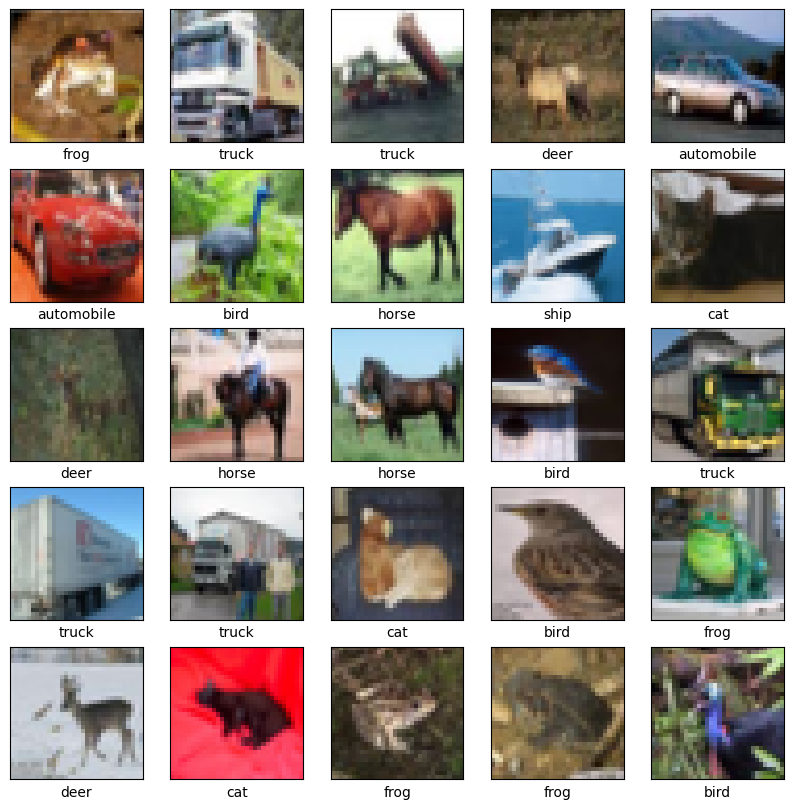

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### 畳み込みの基礎部分の作成

下記の6行のコードは、一般的なパターンで畳み込みの基礎部分を定義しています: [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) と [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) レイヤーのスタック。

入力として、CNNはバッチサイズを無視して、形状（image_height、image_width、color_channels）のテンソルを取ります。これらのディメンションを初めて使用する場合、color_channelsは（R,G,B）を参照します。 この例では、CIFAR　画像の形式である形状（32, 32, 3）の入力を処理するようにCNNを構成します。これを行うには、引数`input_shape`を最初のレイヤーに渡します。


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

これまでのモデルのアーキテクチャを表示します。

In [6]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 30, 30, 32)        896       


 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


Total params: 56320 (220.00 KB)


Trainable params: 56320 (220.00 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


上記より、すべての Conv2D と MaxPooling2D レイヤーの出力は shape (height, width, channels) の 3D テンソルであることがわかります。width と height の寸法は、ネットワークが深くなるにつれて縮小する傾向があります。各 Conv2D レイヤーの出力チャネルの数は、第一引数 (例: 32 または 64) によって制御されます。通常、width とheight が縮小すると、各 Conv2D レイヤーにさらに出力チャネルを追加する余裕が (計算上) できます。

### 上に Dense レイヤーを追加

モデルを完成するために、(shape (3, 3, 64) の) 畳み込みの基礎部分からの最後の出力テンソルを、1つ以上の Dense レイヤーに入れて分類を実行します。現在の出力は 3D テンソルですが、Dense レイヤーは入力としてベクトル (1D) を取ります。まず、3D 出力を 1D に平滑化 (または展開) してから、最上部に1つ以上の Dense レイヤーを追加します。MNIST は 10 個の出力クラスを持ちます。そのため、我々は最後の Dense レイヤーの出力を 10 にし、softmax関数を使用します。

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

モデルの完全なアーキテクチャは次のとおりです。

In [8]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 30, 30, 32)        896       


 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


 flatten (Flatten)           (None, 1024)              0         


 dense (Dense)               (None, 64)                65600     


 dense_1 (Dense)             (None, 10)                650       


Total params: 122570 (478.79 KB)


Trainable params: 122570 (478.79 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


ネットワークの要約は、(4, 4, 64) 出力が、2 つの高密度レイヤーを通過する前に形状のベクトル (1024) に平坦化されたことを示しています。

### モデルのコンパイルと学習

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


I0000 00:00:1705011960.257626 1026150 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


   1/1563 [..............................] - ETA: 1:12:47 - loss: 2.3073 - accuracy: 0.0000e+00

  13/1563 [..............................] - ETA: 6s - loss: 2.3171 - accuracy: 0.1010         

  27/1563 [..............................] - ETA: 6s - loss: 2.3091 - accuracy: 0.1076

  41/1563 [..............................] - ETA: 5s - loss: 2.3007 - accuracy: 0.1242

  55/1563 [>.............................] - ETA: 5s - loss: 2.2911 - accuracy: 0.1312

  69/1563 [>.............................] - ETA: 5s - loss: 2.2725 - accuracy: 0.1431

  83/1563 [>.............................] - ETA: 5s - loss: 2.2436 - accuracy: 0.1525

  97/1563 [>.............................] - ETA: 5s - loss: 2.2096 - accuracy: 0.1633

 111/1563 [=>............................] - ETA: 5s - loss: 2.1897 - accuracy: 0.1717

 125/1563 [=>............................] - ETA: 5s - loss: 2.1743 - accuracy: 0.1800

 139/1563 [=>............................] - ETA: 5s - loss: 2.1533 - accuracy: 0.1884

 153/1563 [=>............................] - ETA: 5s - loss: 2.1331 - accuracy: 0.1969

 167/1563 [==>...........................] - ETA: 5s - loss: 2.1192 - accuracy: 0.2038

 181/1563 [==>...........................] - ETA: 5s - loss: 2.1005 - accuracy: 0.2155

 195/1563 [==>...........................] - ETA: 5s - loss: 2.0822 - accuracy: 0.2212

 209/1563 [===>..........................] - ETA: 5s - loss: 2.0648 - accuracy: 0.2289

 223/1563 [===>..........................] - ETA: 4s - loss: 2.0513 - accuracy: 0.2343

 237/1563 [===>..........................] - ETA: 4s - loss: 2.0348 - accuracy: 0.2398

 251/1563 [===>..........................] - ETA: 4s - loss: 2.0155 - accuracy: 0.2481

 265/1563 [====>.........................] - ETA: 4s - loss: 2.0004 - accuracy: 0.2533

 279/1563 [====>.........................] - ETA: 4s - loss: 1.9866 - accuracy: 0.2604

 293/1563 [====>.........................] - ETA: 4s - loss: 1.9703 - accuracy: 0.2667

 307/1563 [====>.........................] - ETA: 4s - loss: 1.9607 - accuracy: 0.2711

 321/1563 [=====>........................] - ETA: 4s - loss: 1.9509 - accuracy: 0.2750

 335/1563 [=====>........................] - ETA: 4s - loss: 1.9393 - accuracy: 0.2808

 349/1563 [=====>........................] - ETA: 4s - loss: 1.9273 - accuracy: 0.2856

 363/1563 [=====>........................] - ETA: 4s - loss: 1.9174 - accuracy: 0.2896

 377/1563 [======>.......................] - ETA: 4s - loss: 1.9104 - accuracy: 0.2917

 391/1563 [======>.......................] - ETA: 4s - loss: 1.9008 - accuracy: 0.2948

 405/1563 [======>.......................] - ETA: 4s - loss: 1.8926 - accuracy: 0.2965

 419/1563 [=======>......................] - ETA: 4s - loss: 1.8806 - accuracy: 0.3021

 433/1563 [=======>......................] - ETA: 4s - loss: 1.8726 - accuracy: 0.3058

 447/1563 [=======>......................] - ETA: 4s - loss: 1.8618 - accuracy: 0.3096

 461/1563 [=======>......................] - ETA: 4s - loss: 1.8538 - accuracy: 0.3131

 475/1563 [========>.....................] - ETA: 4s - loss: 1.8443 - accuracy: 0.3167

 489/1563 [========>.....................] - ETA: 3s - loss: 1.8350 - accuracy: 0.3209

 503/1563 [========>.....................] - ETA: 3s - loss: 1.8242 - accuracy: 0.3254

 517/1563 [========>.....................] - ETA: 3s - loss: 1.8175 - accuracy: 0.3277

 531/1563 [=========>....................] - ETA: 3s - loss: 1.8064 - accuracy: 0.3326

 545/1563 [=========>....................] - ETA: 3s - loss: 1.7973 - accuracy: 0.3357

 559/1563 [=========>....................] - ETA: 3s - loss: 1.7898 - accuracy: 0.3389

 573/1563 [=========>....................] - ETA: 3s - loss: 1.7789 - accuracy: 0.3428

 587/1563 [==========>...................] - ETA: 3s - loss: 1.7735 - accuracy: 0.3453

 601/1563 [==========>...................] - ETA: 3s - loss: 1.7647 - accuracy: 0.3496

 615/1563 [==========>...................] - ETA: 3s - loss: 1.7586 - accuracy: 0.3523

 629/1563 [===========>..................] - ETA: 3s - loss: 1.7533 - accuracy: 0.3542

 643/1563 [===========>..................] - ETA: 3s - loss: 1.7470 - accuracy: 0.3564

 657/1563 [===========>..................] - ETA: 3s - loss: 1.7412 - accuracy: 0.3584

 672/1563 [===========>..................] - ETA: 3s - loss: 1.7366 - accuracy: 0.3601

 686/1563 [============>.................] - ETA: 3s - loss: 1.7306 - accuracy: 0.3626

 700/1563 [============>.................] - ETA: 3s - loss: 1.7272 - accuracy: 0.3639

 714/1563 [============>.................] - ETA: 3s - loss: 1.7217 - accuracy: 0.3659

 728/1563 [============>.................] - ETA: 3s - loss: 1.7163 - accuracy: 0.3679

 742/1563 [=============>................] - ETA: 3s - loss: 1.7103 - accuracy: 0.3705

 756/1563 [=============>................] - ETA: 2s - loss: 1.7069 - accuracy: 0.3717

 770/1563 [=============>................] - ETA: 2s - loss: 1.7028 - accuracy: 0.3740

 784/1563 [==============>...............] - ETA: 2s - loss: 1.6981 - accuracy: 0.3763

 798/1563 [==============>...............] - ETA: 2s - loss: 1.6936 - accuracy: 0.3781

 812/1563 [==============>...............] - ETA: 2s - loss: 1.6907 - accuracy: 0.3793

 826/1563 [==============>...............] - ETA: 2s - loss: 1.6861 - accuracy: 0.3811

 840/1563 [===============>..............] - ETA: 2s - loss: 1.6821 - accuracy: 0.3828

 854/1563 [===============>..............] - ETA: 2s - loss: 1.6772 - accuracy: 0.3856

 868/1563 [===============>..............] - ETA: 2s - loss: 1.6724 - accuracy: 0.3870

 882/1563 [===============>..............] - ETA: 2s - loss: 1.6692 - accuracy: 0.3880

 896/1563 [================>.............] - ETA: 2s - loss: 1.6645 - accuracy: 0.3900

 910/1563 [================>.............] - ETA: 2s - loss: 1.6608 - accuracy: 0.3917

 924/1563 [================>.............] - ETA: 2s - loss: 1.6554 - accuracy: 0.3938

 938/1563 [=================>............] - ETA: 2s - loss: 1.6511 - accuracy: 0.3954

 952/1563 [=================>............] - ETA: 2s - loss: 1.6476 - accuracy: 0.3969

 966/1563 [=================>............] - ETA: 2s - loss: 1.6441 - accuracy: 0.3987

 980/1563 [=================>............] - ETA: 2s - loss: 1.6408 - accuracy: 0.4002

 994/1563 [==================>...........] - ETA: 2s - loss: 1.6369 - accuracy: 0.4018

1008/1563 [==================>...........] - ETA: 2s - loss: 1.6324 - accuracy: 0.4035

1022/1563 [==================>...........] - ETA: 1s - loss: 1.6296 - accuracy: 0.4045

1036/1563 [==================>...........] - ETA: 1s - loss: 1.6243 - accuracy: 0.4064

1050/1563 [===================>..........] - ETA: 1s - loss: 1.6212 - accuracy: 0.4076

1064/1563 [===================>..........] - ETA: 1s - loss: 1.6169 - accuracy: 0.4093

1078/1563 [===================>..........] - ETA: 1s - loss: 1.6124 - accuracy: 0.4109

1092/1563 [===================>..........] - ETA: 1s - loss: 1.6086 - accuracy: 0.4125

1106/1563 [====================>.........] - ETA: 1s - loss: 1.6048 - accuracy: 0.4147

1121/1563 [====================>.........] - ETA: 1s - loss: 1.6017 - accuracy: 0.4158

1135/1563 [====================>.........] - ETA: 1s - loss: 1.5991 - accuracy: 0.4168

1149/1563 [=====================>........] - ETA: 1s - loss: 1.5965 - accuracy: 0.4176

1163/1563 [=====================>........] - ETA: 1s - loss: 1.5924 - accuracy: 0.4191

1177/1563 [=====================>........] - ETA: 1s - loss: 1.5897 - accuracy: 0.4202

1192/1563 [=====================>........] - ETA: 1s - loss: 1.5878 - accuracy: 0.4207

1206/1563 [======================>.......] - ETA: 1s - loss: 1.5862 - accuracy: 0.4213

1220/1563 [======================>.......] - ETA: 1s - loss: 1.5810 - accuracy: 0.4234

1234/1563 [======================>.......] - ETA: 1s - loss: 1.5784 - accuracy: 0.4249

1249/1563 [======================>.......] - ETA: 1s - loss: 1.5751 - accuracy: 0.4263

1264/1563 [=======================>......] - ETA: 1s - loss: 1.5712 - accuracy: 0.4278

1279/1563 [=======================>......] - ETA: 1s - loss: 1.5685 - accuracy: 0.4286

1293/1563 [=======================>......] - ETA: 0s - loss: 1.5653 - accuracy: 0.4296

1307/1563 [========================>.....] - ETA: 0s - loss: 1.5626 - accuracy: 0.4307

1322/1563 [========================>.....] - ETA: 0s - loss: 1.5598 - accuracy: 0.4318

1336/1563 [========================>.....] - ETA: 0s - loss: 1.5570 - accuracy: 0.4328

1350/1563 [========================>.....] - ETA: 0s - loss: 1.5551 - accuracy: 0.4334

1364/1563 [=========================>....] - ETA: 0s - loss: 1.5527 - accuracy: 0.4341

1378/1563 [=========================>....] - ETA: 0s - loss: 1.5504 - accuracy: 0.4350

1392/1563 [=========================>....] - ETA: 0s - loss: 1.5478 - accuracy: 0.4358

1406/1563 [=========================>....] - ETA: 0s - loss: 1.5446 - accuracy: 0.4370

1420/1563 [==========================>...] - ETA: 0s - loss: 1.5421 - accuracy: 0.4379

1434/1563 [==========================>...] - ETA: 0s - loss: 1.5391 - accuracy: 0.4387

1448/1563 [==========================>...] - ETA: 0s - loss: 1.5361 - accuracy: 0.4398

1462/1563 [===========================>..] - ETA: 0s - loss: 1.5351 - accuracy: 0.4406

1476/1563 [===========================>..] - ETA: 0s - loss: 1.5327 - accuracy: 0.4418

1490/1563 [===========================>..] - ETA: 0s - loss: 1.5306 - accuracy: 0.4427

1504/1563 [===========================>..] - ETA: 0s - loss: 1.5276 - accuracy: 0.4439

1518/1563 [============================>.] - ETA: 0s - loss: 1.5244 - accuracy: 0.4451

1532/1563 [============================>.] - ETA: 0s - loss: 1.5221 - accuracy: 0.4461

1546/1563 [============================>.] - ETA: 0s - loss: 1.5201 - accuracy: 0.4468

1560/1563 [============================>.] - ETA: 0s - loss: 1.5180 - accuracy: 0.4476

1563/1563 [==============================] - ETA: 0s - loss: 1.5172 - accuracy: 0.4479

1563/1563 [==============================] - 10s 5ms/step - loss: 1.5172 - accuracy: 0.4479 - val_loss: 1.2221 - val_accuracy: 0.5568


Epoch 2/10


   1/1563 [..............................] - ETA: 7s - loss: 0.9949 - accuracy: 0.6250

  15/1563 [..............................] - ETA: 5s - loss: 1.2053 - accuracy: 0.5625

  29/1563 [..............................] - ETA: 5s - loss: 1.2460 - accuracy: 0.5485

  43/1563 [..............................] - ETA: 5s - loss: 1.2374 - accuracy: 0.5487

  57/1563 [>.............................] - ETA: 5s - loss: 1.2484 - accuracy: 0.5526

  71/1563 [>.............................] - ETA: 5s - loss: 1.2363 - accuracy: 0.5568

  85/1563 [>.............................] - ETA: 5s - loss: 1.2388 - accuracy: 0.5607

  99/1563 [>.............................] - ETA: 5s - loss: 1.2311 - accuracy: 0.5625

 113/1563 [=>............................] - ETA: 5s - loss: 1.2289 - accuracy: 0.5650

 127/1563 [=>............................] - ETA: 5s - loss: 1.2288 - accuracy: 0.5647

 141/1563 [=>............................] - ETA: 5s - loss: 1.2318 - accuracy: 0.5649

 155/1563 [=>............................] - ETA: 5s - loss: 1.2289 - accuracy: 0.5665

 169/1563 [==>...........................] - ETA: 5s - loss: 1.2209 - accuracy: 0.5682

 183/1563 [==>...........................] - ETA: 5s - loss: 1.2147 - accuracy: 0.5688

 197/1563 [==>...........................] - ETA: 5s - loss: 1.2136 - accuracy: 0.5685

 211/1563 [===>..........................] - ETA: 4s - loss: 1.2100 - accuracy: 0.5708

 225/1563 [===>..........................] - ETA: 4s - loss: 1.2083 - accuracy: 0.5713

 239/1563 [===>..........................] - ETA: 4s - loss: 1.2070 - accuracy: 0.5734

 253/1563 [===>..........................] - ETA: 4s - loss: 1.2082 - accuracy: 0.5729

 267/1563 [====>.........................] - ETA: 4s - loss: 1.2086 - accuracy: 0.5705

 281/1563 [====>.........................] - ETA: 4s - loss: 1.2082 - accuracy: 0.5711

 295/1563 [====>.........................] - ETA: 4s - loss: 1.2053 - accuracy: 0.5722

 309/1563 [====>.........................] - ETA: 4s - loss: 1.2025 - accuracy: 0.5722

 323/1563 [=====>........................] - ETA: 4s - loss: 1.1958 - accuracy: 0.5736

 337/1563 [=====>........................] - ETA: 4s - loss: 1.1957 - accuracy: 0.5736

 351/1563 [=====>........................] - ETA: 4s - loss: 1.1965 - accuracy: 0.5731

 365/1563 [======>.......................] - ETA: 4s - loss: 1.1967 - accuracy: 0.5727

 379/1563 [======>.......................] - ETA: 4s - loss: 1.1949 - accuracy: 0.5738

 393/1563 [======>.......................] - ETA: 4s - loss: 1.1980 - accuracy: 0.5723

 407/1563 [======>.......................] - ETA: 4s - loss: 1.2002 - accuracy: 0.5715

 421/1563 [=======>......................] - ETA: 4s - loss: 1.1996 - accuracy: 0.5710

 435/1563 [=======>......................] - ETA: 4s - loss: 1.2009 - accuracy: 0.5704

 449/1563 [=======>......................] - ETA: 4s - loss: 1.1997 - accuracy: 0.5718

 463/1563 [=======>......................] - ETA: 4s - loss: 1.1946 - accuracy: 0.5732

 477/1563 [========>.....................] - ETA: 3s - loss: 1.1934 - accuracy: 0.5741

 491/1563 [========>.....................] - ETA: 3s - loss: 1.1925 - accuracy: 0.5750

 505/1563 [========>.....................] - ETA: 3s - loss: 1.1939 - accuracy: 0.5745

 519/1563 [========>.....................] - ETA: 3s - loss: 1.1941 - accuracy: 0.5747

 533/1563 [=========>....................] - ETA: 3s - loss: 1.1912 - accuracy: 0.5753

 547/1563 [=========>....................] - ETA: 3s - loss: 1.1895 - accuracy: 0.5756

 561/1563 [=========>....................] - ETA: 3s - loss: 1.1894 - accuracy: 0.5752

 575/1563 [==========>...................] - ETA: 3s - loss: 1.1896 - accuracy: 0.5757

 589/1563 [==========>...................] - ETA: 3s - loss: 1.1904 - accuracy: 0.5751

 603/1563 [==========>...................] - ETA: 3s - loss: 1.1882 - accuracy: 0.5759

 618/1563 [==========>...................] - ETA: 3s - loss: 1.1865 - accuracy: 0.5766

 632/1563 [===========>..................] - ETA: 3s - loss: 1.1864 - accuracy: 0.5770

 646/1563 [===========>..................] - ETA: 3s - loss: 1.1876 - accuracy: 0.5762

 660/1563 [===========>..................] - ETA: 3s - loss: 1.1873 - accuracy: 0.5765

 674/1563 [===========>..................] - ETA: 3s - loss: 1.1862 - accuracy: 0.5772

 688/1563 [============>.................] - ETA: 3s - loss: 1.1839 - accuracy: 0.5782

 702/1563 [============>.................] - ETA: 3s - loss: 1.1824 - accuracy: 0.5790

 716/1563 [============>.................] - ETA: 3s - loss: 1.1823 - accuracy: 0.5793

 730/1563 [=============>................] - ETA: 3s - loss: 1.1811 - accuracy: 0.5798

 744/1563 [=============>................] - ETA: 3s - loss: 1.1823 - accuracy: 0.5794

 758/1563 [=============>................] - ETA: 2s - loss: 1.1806 - accuracy: 0.5804

 771/1563 [=============>................] - ETA: 2s - loss: 1.1822 - accuracy: 0.5795

 785/1563 [==============>...............] - ETA: 2s - loss: 1.1833 - accuracy: 0.5794

 799/1563 [==============>...............] - ETA: 2s - loss: 1.1836 - accuracy: 0.5791

 813/1563 [==============>...............] - ETA: 2s - loss: 1.1840 - accuracy: 0.5790

 827/1563 [==============>...............] - ETA: 2s - loss: 1.1839 - accuracy: 0.5791

 841/1563 [===============>..............] - ETA: 2s - loss: 1.1841 - accuracy: 0.5792

 855/1563 [===============>..............] - ETA: 2s - loss: 1.1832 - accuracy: 0.5792

 869/1563 [===============>..............] - ETA: 2s - loss: 1.1827 - accuracy: 0.5792

 883/1563 [===============>..............] - ETA: 2s - loss: 1.1821 - accuracy: 0.5790

 897/1563 [================>.............] - ETA: 2s - loss: 1.1824 - accuracy: 0.5792

 911/1563 [================>.............] - ETA: 2s - loss: 1.1818 - accuracy: 0.5796

 925/1563 [================>.............] - ETA: 2s - loss: 1.1811 - accuracy: 0.5797

 939/1563 [=================>............] - ETA: 2s - loss: 1.1809 - accuracy: 0.5799

 953/1563 [=================>............] - ETA: 2s - loss: 1.1802 - accuracy: 0.5805

 967/1563 [=================>............] - ETA: 2s - loss: 1.1793 - accuracy: 0.5806

 981/1563 [=================>............] - ETA: 2s - loss: 1.1786 - accuracy: 0.5804

 995/1563 [==================>...........] - ETA: 2s - loss: 1.1806 - accuracy: 0.5796

1009/1563 [==================>...........] - ETA: 2s - loss: 1.1823 - accuracy: 0.5791

1023/1563 [==================>...........] - ETA: 1s - loss: 1.1812 - accuracy: 0.5799

1037/1563 [==================>...........] - ETA: 1s - loss: 1.1801 - accuracy: 0.5807

1051/1563 [===================>..........] - ETA: 1s - loss: 1.1785 - accuracy: 0.5816

1065/1563 [===================>..........] - ETA: 1s - loss: 1.1771 - accuracy: 0.5823

1079/1563 [===================>..........] - ETA: 1s - loss: 1.1760 - accuracy: 0.5827

1093/1563 [===================>..........] - ETA: 1s - loss: 1.1745 - accuracy: 0.5832

1107/1563 [====================>.........] - ETA: 1s - loss: 1.1757 - accuracy: 0.5829

1121/1563 [====================>.........] - ETA: 1s - loss: 1.1758 - accuracy: 0.5831

1135/1563 [====================>.........] - ETA: 1s - loss: 1.1746 - accuracy: 0.5835

1149/1563 [=====================>........] - ETA: 1s - loss: 1.1743 - accuracy: 0.5836

1163/1563 [=====================>........] - ETA: 1s - loss: 1.1738 - accuracy: 0.5839

1177/1563 [=====================>........] - ETA: 1s - loss: 1.1732 - accuracy: 0.5842

1191/1563 [=====================>........] - ETA: 1s - loss: 1.1719 - accuracy: 0.5846

1205/1563 [======================>.......] - ETA: 1s - loss: 1.1709 - accuracy: 0.5851

1219/1563 [======================>.......] - ETA: 1s - loss: 1.1699 - accuracy: 0.5853

1233/1563 [======================>.......] - ETA: 1s - loss: 1.1694 - accuracy: 0.5858

1247/1563 [======================>.......] - ETA: 1s - loss: 1.1689 - accuracy: 0.5861

1261/1563 [=======================>......] - ETA: 1s - loss: 1.1678 - accuracy: 0.5864

1276/1563 [=======================>......] - ETA: 1s - loss: 1.1666 - accuracy: 0.5869

1290/1563 [=======================>......] - ETA: 1s - loss: 1.1663 - accuracy: 0.5873

1304/1563 [========================>.....] - ETA: 0s - loss: 1.1658 - accuracy: 0.5879

1318/1563 [========================>.....] - ETA: 0s - loss: 1.1663 - accuracy: 0.5877

1332/1563 [========================>.....] - ETA: 0s - loss: 1.1655 - accuracy: 0.5881

1346/1563 [========================>.....] - ETA: 0s - loss: 1.1644 - accuracy: 0.5885

1360/1563 [=========================>....] - ETA: 0s - loss: 1.1639 - accuracy: 0.5888

1374/1563 [=========================>....] - ETA: 0s - loss: 1.1633 - accuracy: 0.5890

1388/1563 [=========================>....] - ETA: 0s - loss: 1.1629 - accuracy: 0.5892

1402/1563 [=========================>....] - ETA: 0s - loss: 1.1617 - accuracy: 0.5894

1417/1563 [==========================>...] - ETA: 0s - loss: 1.1610 - accuracy: 0.5895

1431/1563 [==========================>...] - ETA: 0s - loss: 1.1598 - accuracy: 0.5899

1445/1563 [==========================>...] - ETA: 0s - loss: 1.1599 - accuracy: 0.5899

1459/1563 [===========================>..] - ETA: 0s - loss: 1.1594 - accuracy: 0.5900

1472/1563 [===========================>..] - ETA: 0s - loss: 1.1585 - accuracy: 0.5900

1485/1563 [===========================>..] - ETA: 0s - loss: 1.1582 - accuracy: 0.5902

1499/1563 [===========================>..] - ETA: 0s - loss: 1.1575 - accuracy: 0.5905

1513/1563 [============================>.] - ETA: 0s - loss: 1.1575 - accuracy: 0.5904

1527/1563 [============================>.] - ETA: 0s - loss: 1.1571 - accuracy: 0.5904

1541/1563 [============================>.] - ETA: 0s - loss: 1.1564 - accuracy: 0.5906

1555/1563 [============================>.] - ETA: 0s - loss: 1.1554 - accuracy: 0.5909

1563/1563 [==============================] - 6s 4ms/step - loss: 1.1550 - accuracy: 0.5909 - val_loss: 1.0829 - val_accuracy: 0.6153


Epoch 3/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7595 - accuracy: 0.7812

  15/1563 [..............................] - ETA: 5s - loss: 0.9919 - accuracy: 0.6458

  29/1563 [..............................] - ETA: 5s - loss: 1.0002 - accuracy: 0.6487

  43/1563 [..............................] - ETA: 5s - loss: 1.0407 - accuracy: 0.6359

  57/1563 [>.............................] - ETA: 5s - loss: 1.0683 - accuracy: 0.6234

  71/1563 [>.............................] - ETA: 5s - loss: 1.0606 - accuracy: 0.6224

  85/1563 [>.............................] - ETA: 5s - loss: 1.0608 - accuracy: 0.6217

  99/1563 [>.............................] - ETA: 5s - loss: 1.0622 - accuracy: 0.6222

 113/1563 [=>............................] - ETA: 5s - loss: 1.0680 - accuracy: 0.6242

 127/1563 [=>............................] - ETA: 5s - loss: 1.0700 - accuracy: 0.6250

 141/1563 [=>............................] - ETA: 5s - loss: 1.0608 - accuracy: 0.6283

 155/1563 [=>............................] - ETA: 5s - loss: 1.0685 - accuracy: 0.6264

 169/1563 [==>...........................] - ETA: 5s - loss: 1.0569 - accuracy: 0.6315

 183/1563 [==>...........................] - ETA: 5s - loss: 1.0567 - accuracy: 0.6327

 197/1563 [==>...........................] - ETA: 5s - loss: 1.0556 - accuracy: 0.6317

 212/1563 [===>..........................] - ETA: 4s - loss: 1.0587 - accuracy: 0.6306

 227/1563 [===>..........................] - ETA: 4s - loss: 1.0574 - accuracy: 0.6309

 242/1563 [===>..........................] - ETA: 4s - loss: 1.0551 - accuracy: 0.6294

 256/1563 [===>..........................] - ETA: 4s - loss: 1.0511 - accuracy: 0.6304

 270/1563 [====>.........................] - ETA: 4s - loss: 1.0497 - accuracy: 0.6316

 284/1563 [====>.........................] - ETA: 4s - loss: 1.0475 - accuracy: 0.6318

 298/1563 [====>.........................] - ETA: 4s - loss: 1.0439 - accuracy: 0.6340

 312/1563 [====>.........................] - ETA: 4s - loss: 1.0435 - accuracy: 0.6341

 326/1563 [=====>........................] - ETA: 4s - loss: 1.0429 - accuracy: 0.6345

 340/1563 [=====>........................] - ETA: 4s - loss: 1.0459 - accuracy: 0.6340

 354/1563 [=====>........................] - ETA: 4s - loss: 1.0455 - accuracy: 0.6336

 368/1563 [======>.......................] - ETA: 4s - loss: 1.0452 - accuracy: 0.6328

 382/1563 [======>.......................] - ETA: 4s - loss: 1.0475 - accuracy: 0.6322

 396/1563 [======>.......................] - ETA: 4s - loss: 1.0446 - accuracy: 0.6323

 410/1563 [======>.......................] - ETA: 4s - loss: 1.0412 - accuracy: 0.6334

 424/1563 [=======>......................] - ETA: 4s - loss: 1.0417 - accuracy: 0.6335

 438/1563 [=======>......................] - ETA: 4s - loss: 1.0408 - accuracy: 0.6331

 452/1563 [=======>......................] - ETA: 4s - loss: 1.0423 - accuracy: 0.6323

 466/1563 [=======>......................] - ETA: 4s - loss: 1.0428 - accuracy: 0.6316

 480/1563 [========>.....................] - ETA: 3s - loss: 1.0414 - accuracy: 0.6321

 494/1563 [========>.....................] - ETA: 3s - loss: 1.0408 - accuracy: 0.6324

 508/1563 [========>.....................] - ETA: 3s - loss: 1.0396 - accuracy: 0.6332

 522/1563 [=========>....................] - ETA: 3s - loss: 1.0410 - accuracy: 0.6331

 536/1563 [=========>....................] - ETA: 3s - loss: 1.0413 - accuracy: 0.6333

 551/1563 [=========>....................] - ETA: 3s - loss: 1.0418 - accuracy: 0.6328

 565/1563 [=========>....................] - ETA: 3s - loss: 1.0393 - accuracy: 0.6345

 579/1563 [==========>...................] - ETA: 3s - loss: 1.0386 - accuracy: 0.6348

 593/1563 [==========>...................] - ETA: 3s - loss: 1.0387 - accuracy: 0.6349

 607/1563 [==========>...................] - ETA: 3s - loss: 1.0382 - accuracy: 0.6352

 621/1563 [==========>...................] - ETA: 3s - loss: 1.0378 - accuracy: 0.6356

 635/1563 [===========>..................] - ETA: 3s - loss: 1.0362 - accuracy: 0.6364

 649/1563 [===========>..................] - ETA: 3s - loss: 1.0343 - accuracy: 0.6370

 663/1563 [===========>..................] - ETA: 3s - loss: 1.0336 - accuracy: 0.6367

 677/1563 [===========>..................] - ETA: 3s - loss: 1.0348 - accuracy: 0.6361

 691/1563 [============>.................] - ETA: 3s - loss: 1.0361 - accuracy: 0.6355

 705/1563 [============>.................] - ETA: 3s - loss: 1.0347 - accuracy: 0.6355

 719/1563 [============>.................] - ETA: 3s - loss: 1.0349 - accuracy: 0.6353

 733/1563 [=============>................] - ETA: 3s - loss: 1.0341 - accuracy: 0.6355

 748/1563 [=============>................] - ETA: 2s - loss: 1.0322 - accuracy: 0.6360

 763/1563 [=============>................] - ETA: 2s - loss: 1.0320 - accuracy: 0.6365

 777/1563 [=============>................] - ETA: 2s - loss: 1.0324 - accuracy: 0.6363

 791/1563 [==============>...............] - ETA: 2s - loss: 1.0327 - accuracy: 0.6364

 805/1563 [==============>...............] - ETA: 2s - loss: 1.0334 - accuracy: 0.6363

 819/1563 [==============>...............] - ETA: 2s - loss: 1.0343 - accuracy: 0.6362

 833/1563 [==============>...............] - ETA: 2s - loss: 1.0343 - accuracy: 0.6358

 847/1563 [===============>..............] - ETA: 2s - loss: 1.0353 - accuracy: 0.6354

 861/1563 [===============>..............] - ETA: 2s - loss: 1.0345 - accuracy: 0.6353

 876/1563 [===============>..............] - ETA: 2s - loss: 1.0346 - accuracy: 0.6355

 890/1563 [================>.............] - ETA: 2s - loss: 1.0356 - accuracy: 0.6348

 904/1563 [================>.............] - ETA: 2s - loss: 1.0343 - accuracy: 0.6353

 918/1563 [================>.............] - ETA: 2s - loss: 1.0335 - accuracy: 0.6356

 932/1563 [================>.............] - ETA: 2s - loss: 1.0343 - accuracy: 0.6355

 946/1563 [=================>............] - ETA: 2s - loss: 1.0334 - accuracy: 0.6358

 961/1563 [=================>............] - ETA: 2s - loss: 1.0332 - accuracy: 0.6357

 975/1563 [=================>............] - ETA: 2s - loss: 1.0325 - accuracy: 0.6361

 989/1563 [=================>............] - ETA: 2s - loss: 1.0314 - accuracy: 0.6363

1003/1563 [==================>...........] - ETA: 2s - loss: 1.0310 - accuracy: 0.6365

1018/1563 [==================>...........] - ETA: 1s - loss: 1.0316 - accuracy: 0.6364

1032/1563 [==================>...........] - ETA: 1s - loss: 1.0314 - accuracy: 0.6364

1046/1563 [===================>..........] - ETA: 1s - loss: 1.0309 - accuracy: 0.6366

1060/1563 [===================>..........] - ETA: 1s - loss: 1.0305 - accuracy: 0.6367

1074/1563 [===================>..........] - ETA: 1s - loss: 1.0314 - accuracy: 0.6362

1088/1563 [===================>..........] - ETA: 1s - loss: 1.0305 - accuracy: 0.6365

1102/1563 [====================>.........] - ETA: 1s - loss: 1.0305 - accuracy: 0.6365

1116/1563 [====================>.........] - ETA: 1s - loss: 1.0288 - accuracy: 0.6373

1130/1563 [====================>.........] - ETA: 1s - loss: 1.0287 - accuracy: 0.6374

1144/1563 [====================>.........] - ETA: 1s - loss: 1.0281 - accuracy: 0.6375

1158/1563 [=====================>........] - ETA: 1s - loss: 1.0277 - accuracy: 0.6377

1172/1563 [=====================>........] - ETA: 1s - loss: 1.0278 - accuracy: 0.6379

1187/1563 [=====================>........] - ETA: 1s - loss: 1.0278 - accuracy: 0.6376

1201/1563 [======================>.......] - ETA: 1s - loss: 1.0288 - accuracy: 0.6377

1215/1563 [======================>.......] - ETA: 1s - loss: 1.0276 - accuracy: 0.6381

1229/1563 [======================>.......] - ETA: 1s - loss: 1.0284 - accuracy: 0.6377

1243/1563 [======================>.......] - ETA: 1s - loss: 1.0283 - accuracy: 0.6374

1257/1563 [=======================>......] - ETA: 1s - loss: 1.0284 - accuracy: 0.6374

1271/1563 [=======================>......] - ETA: 1s - loss: 1.0283 - accuracy: 0.6373

1285/1563 [=======================>......] - ETA: 1s - loss: 1.0282 - accuracy: 0.6373

1299/1563 [=======================>......] - ETA: 0s - loss: 1.0279 - accuracy: 0.6377

1313/1563 [========================>.....] - ETA: 0s - loss: 1.0278 - accuracy: 0.6378

1327/1563 [========================>.....] - ETA: 0s - loss: 1.0267 - accuracy: 0.6383

1341/1563 [========================>.....] - ETA: 0s - loss: 1.0252 - accuracy: 0.6390

1355/1563 [=========================>....] - ETA: 0s - loss: 1.0243 - accuracy: 0.6392

1370/1563 [=========================>....] - ETA: 0s - loss: 1.0248 - accuracy: 0.6389

1384/1563 [=========================>....] - ETA: 0s - loss: 1.0238 - accuracy: 0.6396

1399/1563 [=========================>....] - ETA: 0s - loss: 1.0232 - accuracy: 0.6398

1413/1563 [==========================>...] - ETA: 0s - loss: 1.0231 - accuracy: 0.6399

1427/1563 [==========================>...] - ETA: 0s - loss: 1.0240 - accuracy: 0.6396

1441/1563 [==========================>...] - ETA: 0s - loss: 1.0244 - accuracy: 0.6395

1455/1563 [==========================>...] - ETA: 0s - loss: 1.0232 - accuracy: 0.6399

1469/1563 [===========================>..] - ETA: 0s - loss: 1.0225 - accuracy: 0.6401

1483/1563 [===========================>..] - ETA: 0s - loss: 1.0227 - accuracy: 0.6401

1497/1563 [===========================>..] - ETA: 0s - loss: 1.0231 - accuracy: 0.6399

1511/1563 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.6400

1525/1563 [============================>.] - ETA: 0s - loss: 1.0226 - accuracy: 0.6402

1539/1563 [============================>.] - ETA: 0s - loss: 1.0228 - accuracy: 0.6403

1553/1563 [============================>.] - ETA: 0s - loss: 1.0222 - accuracy: 0.6404

1563/1563 [==============================] - 6s 4ms/step - loss: 1.0217 - accuracy: 0.6406 - val_loss: 1.0480 - val_accuracy: 0.6356


Epoch 4/10


   1/1563 [..............................] - ETA: 7s - loss: 1.0670 - accuracy: 0.6250

  14/1563 [..............................] - ETA: 5s - loss: 1.0268 - accuracy: 0.6429

  28/1563 [..............................] - ETA: 5s - loss: 0.9945 - accuracy: 0.6629

  42/1563 [..............................] - ETA: 5s - loss: 0.9578 - accuracy: 0.6704

  56/1563 [>.............................] - ETA: 5s - loss: 0.9557 - accuracy: 0.6708

  70/1563 [>.............................] - ETA: 5s - loss: 0.9486 - accuracy: 0.6719

  85/1563 [>.............................] - ETA: 5s - loss: 0.9563 - accuracy: 0.6713

  99/1563 [>.............................] - ETA: 5s - loss: 0.9463 - accuracy: 0.6701

 113/1563 [=>............................] - ETA: 5s - loss: 0.9499 - accuracy: 0.6670

 127/1563 [=>............................] - ETA: 5s - loss: 0.9398 - accuracy: 0.6700

 141/1563 [=>............................] - ETA: 5s - loss: 0.9402 - accuracy: 0.6698

 155/1563 [=>............................] - ETA: 5s - loss: 0.9384 - accuracy: 0.6704

 169/1563 [==>...........................] - ETA: 5s - loss: 0.9375 - accuracy: 0.6723

 183/1563 [==>...........................] - ETA: 5s - loss: 0.9327 - accuracy: 0.6747

 198/1563 [==>...........................] - ETA: 4s - loss: 0.9321 - accuracy: 0.6758

 212/1563 [===>..........................] - ETA: 4s - loss: 0.9321 - accuracy: 0.6759

 227/1563 [===>..........................] - ETA: 4s - loss: 0.9296 - accuracy: 0.6759

 241/1563 [===>..........................] - ETA: 4s - loss: 0.9299 - accuracy: 0.6756

 255/1563 [===>..........................] - ETA: 4s - loss: 0.9321 - accuracy: 0.6760

 269/1563 [====>.........................] - ETA: 4s - loss: 0.9300 - accuracy: 0.6770

 283/1563 [====>.........................] - ETA: 4s - loss: 0.9314 - accuracy: 0.6784

 297/1563 [====>.........................] - ETA: 4s - loss: 0.9326 - accuracy: 0.6775

 312/1563 [====>.........................] - ETA: 4s - loss: 0.9317 - accuracy: 0.6774

 326/1563 [=====>........................] - ETA: 4s - loss: 0.9308 - accuracy: 0.6762

 341/1563 [=====>........................] - ETA: 4s - loss: 0.9332 - accuracy: 0.6754

 355/1563 [=====>........................] - ETA: 4s - loss: 0.9328 - accuracy: 0.6739

 369/1563 [======>.......................] - ETA: 4s - loss: 0.9297 - accuracy: 0.6739

 383/1563 [======>.......................] - ETA: 4s - loss: 0.9292 - accuracy: 0.6743

 397/1563 [======>.......................] - ETA: 4s - loss: 0.9271 - accuracy: 0.6744

 411/1563 [======>.......................] - ETA: 4s - loss: 0.9272 - accuracy: 0.6754

 425/1563 [=======>......................] - ETA: 4s - loss: 0.9289 - accuracy: 0.6749

 439/1563 [=======>......................] - ETA: 4s - loss: 0.9292 - accuracy: 0.6750

 454/1563 [=======>......................] - ETA: 4s - loss: 0.9301 - accuracy: 0.6745

 468/1563 [=======>......................] - ETA: 3s - loss: 0.9293 - accuracy: 0.6739

 483/1563 [========>.....................] - ETA: 3s - loss: 0.9300 - accuracy: 0.6741

 497/1563 [========>.....................] - ETA: 3s - loss: 0.9349 - accuracy: 0.6723

 512/1563 [========>.....................] - ETA: 3s - loss: 0.9353 - accuracy: 0.6718

 526/1563 [=========>....................] - ETA: 3s - loss: 0.9362 - accuracy: 0.6723

 541/1563 [=========>....................] - ETA: 3s - loss: 0.9354 - accuracy: 0.6727

 556/1563 [=========>....................] - ETA: 3s - loss: 0.9340 - accuracy: 0.6731

 571/1563 [=========>....................] - ETA: 3s - loss: 0.9347 - accuracy: 0.6732

 586/1563 [==========>...................] - ETA: 3s - loss: 0.9358 - accuracy: 0.6734

 601/1563 [==========>...................] - ETA: 3s - loss: 0.9355 - accuracy: 0.6743

 615/1563 [==========>...................] - ETA: 3s - loss: 0.9365 - accuracy: 0.6738

 629/1563 [===========>..................] - ETA: 3s - loss: 0.9369 - accuracy: 0.6740

 643/1563 [===========>..................] - ETA: 3s - loss: 0.9361 - accuracy: 0.6746

 657/1563 [===========>..................] - ETA: 3s - loss: 0.9339 - accuracy: 0.6751

 672/1563 [===========>..................] - ETA: 3s - loss: 0.9338 - accuracy: 0.6749

 687/1563 [============>.................] - ETA: 3s - loss: 0.9337 - accuracy: 0.6746

 702/1563 [============>.................] - ETA: 3s - loss: 0.9340 - accuracy: 0.6745

 716/1563 [============>.................] - ETA: 3s - loss: 0.9345 - accuracy: 0.6747

 730/1563 [=============>................] - ETA: 3s - loss: 0.9343 - accuracy: 0.6749

 744/1563 [=============>................] - ETA: 2s - loss: 0.9346 - accuracy: 0.6746

 758/1563 [=============>................] - ETA: 2s - loss: 0.9333 - accuracy: 0.6749

 772/1563 [=============>................] - ETA: 2s - loss: 0.9337 - accuracy: 0.6747

 786/1563 [==============>...............] - ETA: 2s - loss: 0.9329 - accuracy: 0.6749

 800/1563 [==============>...............] - ETA: 2s - loss: 0.9317 - accuracy: 0.6751

 814/1563 [==============>...............] - ETA: 2s - loss: 0.9313 - accuracy: 0.6754

 828/1563 [==============>...............] - ETA: 2s - loss: 0.9316 - accuracy: 0.6752

 842/1563 [===============>..............] - ETA: 2s - loss: 0.9307 - accuracy: 0.6757

 856/1563 [===============>..............] - ETA: 2s - loss: 0.9297 - accuracy: 0.6760

 870/1563 [===============>..............] - ETA: 2s - loss: 0.9288 - accuracy: 0.6763

 884/1563 [===============>..............] - ETA: 2s - loss: 0.9307 - accuracy: 0.6752

 898/1563 [================>.............] - ETA: 2s - loss: 0.9299 - accuracy: 0.6756

 912/1563 [================>.............] - ETA: 2s - loss: 0.9283 - accuracy: 0.6761

 927/1563 [================>.............] - ETA: 2s - loss: 0.9282 - accuracy: 0.6761

 941/1563 [=================>............] - ETA: 2s - loss: 0.9280 - accuracy: 0.6762

 955/1563 [=================>............] - ETA: 2s - loss: 0.9282 - accuracy: 0.6763

 969/1563 [=================>............] - ETA: 2s - loss: 0.9280 - accuracy: 0.6761

 983/1563 [=================>............] - ETA: 2s - loss: 0.9274 - accuracy: 0.6764

 997/1563 [==================>...........] - ETA: 2s - loss: 0.9275 - accuracy: 0.6765

1011/1563 [==================>...........] - ETA: 1s - loss: 0.9260 - accuracy: 0.6769

1024/1563 [==================>...........] - ETA: 1s - loss: 0.9252 - accuracy: 0.6769

1038/1563 [==================>...........] - ETA: 1s - loss: 0.9258 - accuracy: 0.6764

1052/1563 [===================>..........] - ETA: 1s - loss: 0.9251 - accuracy: 0.6769

1066/1563 [===================>..........] - ETA: 1s - loss: 0.9254 - accuracy: 0.6770

1080/1563 [===================>..........] - ETA: 1s - loss: 0.9244 - accuracy: 0.6772

1094/1563 [===================>..........] - ETA: 1s - loss: 0.9248 - accuracy: 0.6769

1108/1563 [====================>.........] - ETA: 1s - loss: 0.9256 - accuracy: 0.6763

1122/1563 [====================>.........] - ETA: 1s - loss: 0.9263 - accuracy: 0.6758

1137/1563 [====================>.........] - ETA: 1s - loss: 0.9265 - accuracy: 0.6754

1151/1563 [=====================>........] - ETA: 1s - loss: 0.9264 - accuracy: 0.6754

1165/1563 [=====================>........] - ETA: 1s - loss: 0.9260 - accuracy: 0.6756

1179/1563 [=====================>........] - ETA: 1s - loss: 0.9260 - accuracy: 0.6756

1193/1563 [=====================>........] - ETA: 1s - loss: 0.9255 - accuracy: 0.6758

1207/1563 [======================>.......] - ETA: 1s - loss: 0.9251 - accuracy: 0.6760

1221/1563 [======================>.......] - ETA: 1s - loss: 0.9253 - accuracy: 0.6758

1235/1563 [======================>.......] - ETA: 1s - loss: 0.9251 - accuracy: 0.6760

1249/1563 [======================>.......] - ETA: 1s - loss: 0.9248 - accuracy: 0.6761

1263/1563 [=======================>......] - ETA: 1s - loss: 0.9248 - accuracy: 0.6760

1277/1563 [=======================>......] - ETA: 1s - loss: 0.9246 - accuracy: 0.6761

1291/1563 [=======================>......] - ETA: 0s - loss: 0.9247 - accuracy: 0.6761

1305/1563 [========================>.....] - ETA: 0s - loss: 0.9239 - accuracy: 0.6765

1319/1563 [========================>.....] - ETA: 0s - loss: 0.9242 - accuracy: 0.6765

1333/1563 [========================>.....] - ETA: 0s - loss: 0.9251 - accuracy: 0.6761

1347/1563 [========================>.....] - ETA: 0s - loss: 0.9255 - accuracy: 0.6762

1362/1563 [=========================>....] - ETA: 0s - loss: 0.9253 - accuracy: 0.6762

1377/1563 [=========================>....] - ETA: 0s - loss: 0.9260 - accuracy: 0.6761

1391/1563 [=========================>....] - ETA: 0s - loss: 0.9272 - accuracy: 0.6758

1405/1563 [=========================>....] - ETA: 0s - loss: 0.9267 - accuracy: 0.6760

1419/1563 [==========================>...] - ETA: 0s - loss: 0.9261 - accuracy: 0.6761

1433/1563 [==========================>...] - ETA: 0s - loss: 0.9258 - accuracy: 0.6763

1447/1563 [==========================>...] - ETA: 0s - loss: 0.9250 - accuracy: 0.6764

1461/1563 [===========================>..] - ETA: 0s - loss: 0.9255 - accuracy: 0.6763

1475/1563 [===========================>..] - ETA: 0s - loss: 0.9257 - accuracy: 0.6762

1489/1563 [===========================>..] - ETA: 0s - loss: 0.9263 - accuracy: 0.6762

1503/1563 [===========================>..] - ETA: 0s - loss: 0.9264 - accuracy: 0.6763

1517/1563 [============================>.] - ETA: 0s - loss: 0.9268 - accuracy: 0.6762

1531/1563 [============================>.] - ETA: 0s - loss: 0.9268 - accuracy: 0.6762

1546/1563 [============================>.] - ETA: 0s - loss: 0.9276 - accuracy: 0.6762

1561/1563 [============================>.] - ETA: 0s - loss: 0.9276 - accuracy: 0.6763

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9275 - accuracy: 0.6763 - val_loss: 0.9510 - val_accuracy: 0.6671


Epoch 5/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7101 - accuracy: 0.8125

  15/1563 [..............................] - ETA: 5s - loss: 0.7365 - accuracy: 0.7521

  29/1563 [..............................] - ETA: 5s - loss: 0.7900 - accuracy: 0.7263

  43/1563 [..............................] - ETA: 5s - loss: 0.8136 - accuracy: 0.7166

  57/1563 [>.............................] - ETA: 5s - loss: 0.8360 - accuracy: 0.7182

  71/1563 [>.............................] - ETA: 5s - loss: 0.8297 - accuracy: 0.7174

  85/1563 [>.............................] - ETA: 5s - loss: 0.8364 - accuracy: 0.7147

  99/1563 [>.............................] - ETA: 5s - loss: 0.8355 - accuracy: 0.7134

 113/1563 [=>............................] - ETA: 5s - loss: 0.8404 - accuracy: 0.7135

 127/1563 [=>............................] - ETA: 5s - loss: 0.8413 - accuracy: 0.7126

 141/1563 [=>............................] - ETA: 5s - loss: 0.8403 - accuracy: 0.7123

 155/1563 [=>............................] - ETA: 5s - loss: 0.8373 - accuracy: 0.7143

 169/1563 [==>...........................] - ETA: 5s - loss: 0.8422 - accuracy: 0.7119

 183/1563 [==>...........................] - ETA: 5s - loss: 0.8460 - accuracy: 0.7102

 197/1563 [==>...........................] - ETA: 4s - loss: 0.8494 - accuracy: 0.7097

 211/1563 [===>..........................] - ETA: 4s - loss: 0.8521 - accuracy: 0.7096

 225/1563 [===>..........................] - ETA: 4s - loss: 0.8497 - accuracy: 0.7100

 239/1563 [===>..........................] - ETA: 4s - loss: 0.8518 - accuracy: 0.7080

 253/1563 [===>..........................] - ETA: 4s - loss: 0.8498 - accuracy: 0.7075

 267/1563 [====>.........................] - ETA: 4s - loss: 0.8474 - accuracy: 0.7077

 281/1563 [====>.........................] - ETA: 4s - loss: 0.8464 - accuracy: 0.7085

 295/1563 [====>.........................] - ETA: 4s - loss: 0.8507 - accuracy: 0.7075

 309/1563 [====>.........................] - ETA: 4s - loss: 0.8513 - accuracy: 0.7059

 323/1563 [=====>........................] - ETA: 4s - loss: 0.8528 - accuracy: 0.7042

 337/1563 [=====>........................] - ETA: 4s - loss: 0.8524 - accuracy: 0.7038

 351/1563 [=====>........................] - ETA: 4s - loss: 0.8527 - accuracy: 0.7043

 365/1563 [======>.......................] - ETA: 4s - loss: 0.8528 - accuracy: 0.7043

 379/1563 [======>.......................] - ETA: 4s - loss: 0.8508 - accuracy: 0.7044

 393/1563 [======>.......................] - ETA: 4s - loss: 0.8492 - accuracy: 0.7052

 407/1563 [======>.......................] - ETA: 4s - loss: 0.8485 - accuracy: 0.7052

 421/1563 [=======>......................] - ETA: 4s - loss: 0.8499 - accuracy: 0.7058

 435/1563 [=======>......................] - ETA: 4s - loss: 0.8524 - accuracy: 0.7045

 449/1563 [=======>......................] - ETA: 4s - loss: 0.8540 - accuracy: 0.7038

 463/1563 [=======>......................] - ETA: 4s - loss: 0.8496 - accuracy: 0.7056

 477/1563 [========>.....................] - ETA: 3s - loss: 0.8507 - accuracy: 0.7056

 491/1563 [========>.....................] - ETA: 3s - loss: 0.8529 - accuracy: 0.7042

 505/1563 [========>.....................] - ETA: 3s - loss: 0.8552 - accuracy: 0.7032

 519/1563 [========>.....................] - ETA: 3s - loss: 0.8564 - accuracy: 0.7032

 533/1563 [=========>....................] - ETA: 3s - loss: 0.8579 - accuracy: 0.7024

 547/1563 [=========>....................] - ETA: 3s - loss: 0.8593 - accuracy: 0.7020

 562/1563 [=========>....................] - ETA: 3s - loss: 0.8617 - accuracy: 0.7013

 577/1563 [==========>...................] - ETA: 3s - loss: 0.8631 - accuracy: 0.7003

 591/1563 [==========>...................] - ETA: 3s - loss: 0.8616 - accuracy: 0.7008

 605/1563 [==========>...................] - ETA: 3s - loss: 0.8615 - accuracy: 0.7005

 620/1563 [==========>...................] - ETA: 3s - loss: 0.8645 - accuracy: 0.6994

 635/1563 [===========>..................] - ETA: 3s - loss: 0.8641 - accuracy: 0.6992

 650/1563 [===========>..................] - ETA: 3s - loss: 0.8648 - accuracy: 0.6984

 665/1563 [===========>..................] - ETA: 3s - loss: 0.8648 - accuracy: 0.6985

 680/1563 [============>.................] - ETA: 3s - loss: 0.8644 - accuracy: 0.6985

 695/1563 [============>.................] - ETA: 3s - loss: 0.8654 - accuracy: 0.6985

 709/1563 [============>.................] - ETA: 3s - loss: 0.8661 - accuracy: 0.6984

 723/1563 [============>.................] - ETA: 3s - loss: 0.8637 - accuracy: 0.6983

 737/1563 [=============>................] - ETA: 2s - loss: 0.8644 - accuracy: 0.6977

 751/1563 [=============>................] - ETA: 2s - loss: 0.8639 - accuracy: 0.6979

 765/1563 [=============>................] - ETA: 2s - loss: 0.8646 - accuracy: 0.6978

 779/1563 [=============>................] - ETA: 2s - loss: 0.8635 - accuracy: 0.6981

 793/1563 [==============>...............] - ETA: 2s - loss: 0.8621 - accuracy: 0.6984

 807/1563 [==============>...............] - ETA: 2s - loss: 0.8618 - accuracy: 0.6983

 821/1563 [==============>...............] - ETA: 2s - loss: 0.8631 - accuracy: 0.6977

 835/1563 [===============>..............] - ETA: 2s - loss: 0.8631 - accuracy: 0.6978

 849/1563 [===============>..............] - ETA: 2s - loss: 0.8631 - accuracy: 0.6979

 864/1563 [===============>..............] - ETA: 2s - loss: 0.8619 - accuracy: 0.6984

 878/1563 [===============>..............] - ETA: 2s - loss: 0.8629 - accuracy: 0.6984

 892/1563 [================>.............] - ETA: 2s - loss: 0.8629 - accuracy: 0.6986

 905/1563 [================>.............] - ETA: 2s - loss: 0.8647 - accuracy: 0.6982

 919/1563 [================>.............] - ETA: 2s - loss: 0.8654 - accuracy: 0.6982

 933/1563 [================>.............] - ETA: 2s - loss: 0.8661 - accuracy: 0.6977

 947/1563 [=================>............] - ETA: 2s - loss: 0.8646 - accuracy: 0.6985

 960/1563 [=================>............] - ETA: 2s - loss: 0.8642 - accuracy: 0.6984

 973/1563 [=================>............] - ETA: 2s - loss: 0.8634 - accuracy: 0.6988

 986/1563 [=================>............] - ETA: 2s - loss: 0.8633 - accuracy: 0.6989

1000/1563 [==================>...........] - ETA: 2s - loss: 0.8630 - accuracy: 0.6990

1013/1563 [==================>...........] - ETA: 2s - loss: 0.8625 - accuracy: 0.6992

1026/1563 [==================>...........] - ETA: 1s - loss: 0.8614 - accuracy: 0.6996

1040/1563 [==================>...........] - ETA: 1s - loss: 0.8607 - accuracy: 0.6999

1054/1563 [===================>..........] - ETA: 1s - loss: 0.8617 - accuracy: 0.6997

1068/1563 [===================>..........] - ETA: 1s - loss: 0.8620 - accuracy: 0.6996

1082/1563 [===================>..........] - ETA: 1s - loss: 0.8620 - accuracy: 0.6995

1096/1563 [====================>.........] - ETA: 1s - loss: 0.8625 - accuracy: 0.6989

1110/1563 [====================>.........] - ETA: 1s - loss: 0.8631 - accuracy: 0.6986

1124/1563 [====================>.........] - ETA: 1s - loss: 0.8628 - accuracy: 0.6987

1138/1563 [====================>.........] - ETA: 1s - loss: 0.8627 - accuracy: 0.6987

1152/1563 [=====================>........] - ETA: 1s - loss: 0.8634 - accuracy: 0.6986

1166/1563 [=====================>........] - ETA: 1s - loss: 0.8640 - accuracy: 0.6984

1180/1563 [=====================>........] - ETA: 1s - loss: 0.8641 - accuracy: 0.6981

1194/1563 [=====================>........] - ETA: 1s - loss: 0.8641 - accuracy: 0.6982

1208/1563 [======================>.......] - ETA: 1s - loss: 0.8637 - accuracy: 0.6983

1222/1563 [======================>.......] - ETA: 1s - loss: 0.8642 - accuracy: 0.6983

1236/1563 [======================>.......] - ETA: 1s - loss: 0.8642 - accuracy: 0.6983

1250/1563 [======================>.......] - ETA: 1s - loss: 0.8634 - accuracy: 0.6982

1264/1563 [=======================>......] - ETA: 1s - loss: 0.8628 - accuracy: 0.6985

1278/1563 [=======================>......] - ETA: 1s - loss: 0.8635 - accuracy: 0.6986

1292/1563 [=======================>......] - ETA: 0s - loss: 0.8647 - accuracy: 0.6982

1306/1563 [========================>.....] - ETA: 0s - loss: 0.8646 - accuracy: 0.6983

1320/1563 [========================>.....] - ETA: 0s - loss: 0.8644 - accuracy: 0.6982

1334/1563 [========================>.....] - ETA: 0s - loss: 0.8640 - accuracy: 0.6983

1348/1563 [========================>.....] - ETA: 0s - loss: 0.8638 - accuracy: 0.6984

1362/1563 [=========================>....] - ETA: 0s - loss: 0.8633 - accuracy: 0.6987

1376/1563 [=========================>....] - ETA: 0s - loss: 0.8633 - accuracy: 0.6988

1390/1563 [=========================>....] - ETA: 0s - loss: 0.8638 - accuracy: 0.6988

1404/1563 [=========================>....] - ETA: 0s - loss: 0.8634 - accuracy: 0.6990

1418/1563 [==========================>...] - ETA: 0s - loss: 0.8625 - accuracy: 0.6993

1432/1563 [==========================>...] - ETA: 0s - loss: 0.8619 - accuracy: 0.6994

1446/1563 [==========================>...] - ETA: 0s - loss: 0.8622 - accuracy: 0.6993

1460/1563 [===========================>..] - ETA: 0s - loss: 0.8618 - accuracy: 0.6993

1474/1563 [===========================>..] - ETA: 0s - loss: 0.8621 - accuracy: 0.6990

1488/1563 [===========================>..] - ETA: 0s - loss: 0.8622 - accuracy: 0.6988

1502/1563 [===========================>..] - ETA: 0s - loss: 0.8628 - accuracy: 0.6985

1516/1563 [============================>.] - ETA: 0s - loss: 0.8629 - accuracy: 0.6984

1530/1563 [============================>.] - ETA: 0s - loss: 0.8633 - accuracy: 0.6982

1544/1563 [============================>.] - ETA: 0s - loss: 0.8627 - accuracy: 0.6986

1558/1563 [============================>.] - ETA: 0s - loss: 0.8631 - accuracy: 0.6985

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8631 - accuracy: 0.6983 - val_loss: 0.9596 - val_accuracy: 0.6608


Epoch 6/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7334 - accuracy: 0.7812

  15/1563 [..............................] - ETA: 5s - loss: 0.7887 - accuracy: 0.7396

  29/1563 [..............................] - ETA: 5s - loss: 0.7891 - accuracy: 0.7338

  43/1563 [..............................] - ETA: 5s - loss: 0.8092 - accuracy: 0.7340

  57/1563 [>.............................] - ETA: 5s - loss: 0.8061 - accuracy: 0.7357

  71/1563 [>.............................] - ETA: 5s - loss: 0.7886 - accuracy: 0.7394

  85/1563 [>.............................] - ETA: 5s - loss: 0.7842 - accuracy: 0.7390

  99/1563 [>.............................] - ETA: 5s - loss: 0.7985 - accuracy: 0.7336

 113/1563 [=>............................] - ETA: 5s - loss: 0.7898 - accuracy: 0.7351

 127/1563 [=>............................] - ETA: 5s - loss: 0.7837 - accuracy: 0.7352

 141/1563 [=>............................] - ETA: 5s - loss: 0.7937 - accuracy: 0.7316

 154/1563 [=>............................] - ETA: 5s - loss: 0.7912 - accuracy: 0.7307

 168/1563 [==>...........................] - ETA: 5s - loss: 0.7966 - accuracy: 0.7290

 182/1563 [==>...........................] - ETA: 5s - loss: 0.7923 - accuracy: 0.7301

 196/1563 [==>...........................] - ETA: 5s - loss: 0.7927 - accuracy: 0.7293

 210/1563 [===>..........................] - ETA: 5s - loss: 0.7904 - accuracy: 0.7298

 224/1563 [===>..........................] - ETA: 4s - loss: 0.7920 - accuracy: 0.7282

 238/1563 [===>..........................] - ETA: 4s - loss: 0.7948 - accuracy: 0.7272

 252/1563 [===>..........................] - ETA: 4s - loss: 0.7977 - accuracy: 0.7267

 266/1563 [====>.........................] - ETA: 4s - loss: 0.8018 - accuracy: 0.7247

 280/1563 [====>.........................] - ETA: 4s - loss: 0.8048 - accuracy: 0.7239

 294/1563 [====>.........................] - ETA: 4s - loss: 0.8046 - accuracy: 0.7244

 308/1563 [====>.........................] - ETA: 4s - loss: 0.8011 - accuracy: 0.7255

 322/1563 [=====>........................] - ETA: 4s - loss: 0.7982 - accuracy: 0.7260

 336/1563 [=====>........................] - ETA: 4s - loss: 0.7964 - accuracy: 0.7255

 350/1563 [=====>........................] - ETA: 4s - loss: 0.7963 - accuracy: 0.7254

 364/1563 [=====>........................] - ETA: 4s - loss: 0.7979 - accuracy: 0.7246

 378/1563 [======>.......................] - ETA: 4s - loss: 0.7977 - accuracy: 0.7254

 392/1563 [======>.......................] - ETA: 4s - loss: 0.8004 - accuracy: 0.7236

 406/1563 [======>.......................] - ETA: 4s - loss: 0.8034 - accuracy: 0.7224

 420/1563 [=======>......................] - ETA: 4s - loss: 0.8056 - accuracy: 0.7218

 434/1563 [=======>......................] - ETA: 4s - loss: 0.8054 - accuracy: 0.7224

 448/1563 [=======>......................] - ETA: 4s - loss: 0.8086 - accuracy: 0.7215

 462/1563 [=======>......................] - ETA: 4s - loss: 0.8086 - accuracy: 0.7213

 476/1563 [========>.....................] - ETA: 4s - loss: 0.8090 - accuracy: 0.7212

 490/1563 [========>.....................] - ETA: 3s - loss: 0.8108 - accuracy: 0.7202

 504/1563 [========>.....................] - ETA: 3s - loss: 0.8099 - accuracy: 0.7202

 518/1563 [========>.....................] - ETA: 3s - loss: 0.8095 - accuracy: 0.7205

 532/1563 [=========>....................] - ETA: 3s - loss: 0.8082 - accuracy: 0.7203

 546/1563 [=========>....................] - ETA: 3s - loss: 0.8081 - accuracy: 0.7199

 560/1563 [=========>....................] - ETA: 3s - loss: 0.8083 - accuracy: 0.7201

 574/1563 [==========>...................] - ETA: 3s - loss: 0.8088 - accuracy: 0.7198

 588/1563 [==========>...................] - ETA: 3s - loss: 0.8082 - accuracy: 0.7201

 602/1563 [==========>...................] - ETA: 3s - loss: 0.8101 - accuracy: 0.7200

 616/1563 [==========>...................] - ETA: 3s - loss: 0.8110 - accuracy: 0.7191

 630/1563 [===========>..................] - ETA: 3s - loss: 0.8103 - accuracy: 0.7191

 644/1563 [===========>..................] - ETA: 3s - loss: 0.8090 - accuracy: 0.7194

 658/1563 [===========>..................] - ETA: 3s - loss: 0.8064 - accuracy: 0.7199

 672/1563 [===========>..................] - ETA: 3s - loss: 0.8053 - accuracy: 0.7201

 686/1563 [============>.................] - ETA: 3s - loss: 0.8058 - accuracy: 0.7197

 700/1563 [============>.................] - ETA: 3s - loss: 0.8046 - accuracy: 0.7204

 714/1563 [============>.................] - ETA: 3s - loss: 0.8030 - accuracy: 0.7206

 728/1563 [============>.................] - ETA: 3s - loss: 0.8039 - accuracy: 0.7202

 742/1563 [=============>................] - ETA: 3s - loss: 0.8036 - accuracy: 0.7202

 756/1563 [=============>................] - ETA: 2s - loss: 0.8042 - accuracy: 0.7195

 770/1563 [=============>................] - ETA: 2s - loss: 0.8031 - accuracy: 0.7201

 784/1563 [==============>...............] - ETA: 2s - loss: 0.8028 - accuracy: 0.7200

 798/1563 [==============>...............] - ETA: 2s - loss: 0.8038 - accuracy: 0.7197

 812/1563 [==============>...............] - ETA: 2s - loss: 0.8038 - accuracy: 0.7195

 826/1563 [==============>...............] - ETA: 2s - loss: 0.8042 - accuracy: 0.7196

 840/1563 [===============>..............] - ETA: 2s - loss: 0.8043 - accuracy: 0.7196

 854/1563 [===============>..............] - ETA: 2s - loss: 0.8039 - accuracy: 0.7196

 868/1563 [===============>..............] - ETA: 2s - loss: 0.8045 - accuracy: 0.7192

 882/1563 [===============>..............] - ETA: 2s - loss: 0.8056 - accuracy: 0.7184

 896/1563 [================>.............] - ETA: 2s - loss: 0.8068 - accuracy: 0.7180

 910/1563 [================>.............] - ETA: 2s - loss: 0.8074 - accuracy: 0.7179

 924/1563 [================>.............] - ETA: 2s - loss: 0.8072 - accuracy: 0.7179

 938/1563 [=================>............] - ETA: 2s - loss: 0.8072 - accuracy: 0.7179

 952/1563 [=================>............] - ETA: 2s - loss: 0.8073 - accuracy: 0.7181

 966/1563 [=================>............] - ETA: 2s - loss: 0.8084 - accuracy: 0.7176

 980/1563 [=================>............] - ETA: 2s - loss: 0.8084 - accuracy: 0.7174

 994/1563 [==================>...........] - ETA: 2s - loss: 0.8070 - accuracy: 0.7176

1008/1563 [==================>...........] - ETA: 2s - loss: 0.8076 - accuracy: 0.7175

1022/1563 [==================>...........] - ETA: 1s - loss: 0.8072 - accuracy: 0.7175

1036/1563 [==================>...........] - ETA: 1s - loss: 0.8070 - accuracy: 0.7176

1050/1563 [===================>..........] - ETA: 1s - loss: 0.8075 - accuracy: 0.7174

1064/1563 [===================>..........] - ETA: 1s - loss: 0.8069 - accuracy: 0.7177

1078/1563 [===================>..........] - ETA: 1s - loss: 0.8067 - accuracy: 0.7177

1092/1563 [===================>..........] - ETA: 1s - loss: 0.8071 - accuracy: 0.7178

1106/1563 [====================>.........] - ETA: 1s - loss: 0.8079 - accuracy: 0.7173

1120/1563 [====================>.........] - ETA: 1s - loss: 0.8081 - accuracy: 0.7174

1134/1563 [====================>.........] - ETA: 1s - loss: 0.8076 - accuracy: 0.7176

1148/1563 [=====================>........] - ETA: 1s - loss: 0.8073 - accuracy: 0.7176

1162/1563 [=====================>........] - ETA: 1s - loss: 0.8071 - accuracy: 0.7179

1176/1563 [=====================>........] - ETA: 1s - loss: 0.8065 - accuracy: 0.7182

1190/1563 [=====================>........] - ETA: 1s - loss: 0.8064 - accuracy: 0.7182

1204/1563 [======================>.......] - ETA: 1s - loss: 0.8070 - accuracy: 0.7180

1218/1563 [======================>.......] - ETA: 1s - loss: 0.8074 - accuracy: 0.7179

1232/1563 [======================>.......] - ETA: 1s - loss: 0.8074 - accuracy: 0.7179

1246/1563 [======================>.......] - ETA: 1s - loss: 0.8075 - accuracy: 0.7179

1260/1563 [=======================>......] - ETA: 1s - loss: 0.8083 - accuracy: 0.7172

1274/1563 [=======================>......] - ETA: 1s - loss: 0.8081 - accuracy: 0.7173

1288/1563 [=======================>......] - ETA: 1s - loss: 0.8078 - accuracy: 0.7173

1302/1563 [=======================>......] - ETA: 0s - loss: 0.8074 - accuracy: 0.7175

1316/1563 [========================>.....] - ETA: 0s - loss: 0.8074 - accuracy: 0.7176

1330/1563 [========================>.....] - ETA: 0s - loss: 0.8069 - accuracy: 0.7180

1344/1563 [========================>.....] - ETA: 0s - loss: 0.8071 - accuracy: 0.7180

1358/1563 [=========================>....] - ETA: 0s - loss: 0.8068 - accuracy: 0.7180

1372/1563 [=========================>....] - ETA: 0s - loss: 0.8070 - accuracy: 0.7180

1386/1563 [=========================>....] - ETA: 0s - loss: 0.8068 - accuracy: 0.7183

1400/1563 [=========================>....] - ETA: 0s - loss: 0.8062 - accuracy: 0.7183

1414/1563 [==========================>...] - ETA: 0s - loss: 0.8059 - accuracy: 0.7184

1428/1563 [==========================>...] - ETA: 0s - loss: 0.8061 - accuracy: 0.7185

1442/1563 [==========================>...] - ETA: 0s - loss: 0.8060 - accuracy: 0.7184

1456/1563 [==========================>...] - ETA: 0s - loss: 0.8064 - accuracy: 0.7183

1470/1563 [===========================>..] - ETA: 0s - loss: 0.8063 - accuracy: 0.7184

1484/1563 [===========================>..] - ETA: 0s - loss: 0.8055 - accuracy: 0.7187

1498/1563 [===========================>..] - ETA: 0s - loss: 0.8058 - accuracy: 0.7186

1512/1563 [============================>.] - ETA: 0s - loss: 0.8061 - accuracy: 0.7185

1526/1563 [============================>.] - ETA: 0s - loss: 0.8060 - accuracy: 0.7185

1540/1563 [============================>.] - ETA: 0s - loss: 0.8065 - accuracy: 0.7182

1554/1563 [============================>.] - ETA: 0s - loss: 0.8061 - accuracy: 0.7185

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8053 - accuracy: 0.7187 - val_loss: 0.9203 - val_accuracy: 0.6798


Epoch 7/10


   1/1563 [..............................] - ETA: 7s - loss: 0.6332 - accuracy: 0.6875

  15/1563 [..............................] - ETA: 5s - loss: 0.6540 - accuracy: 0.7688

  29/1563 [..............................] - ETA: 5s - loss: 0.6726 - accuracy: 0.7672

  43/1563 [..............................] - ETA: 5s - loss: 0.6891 - accuracy: 0.7631

  57/1563 [>.............................] - ETA: 5s - loss: 0.7050 - accuracy: 0.7599

  71/1563 [>.............................] - ETA: 5s - loss: 0.7393 - accuracy: 0.7465

  85/1563 [>.............................] - ETA: 5s - loss: 0.7423 - accuracy: 0.7467

  99/1563 [>.............................] - ETA: 5s - loss: 0.7494 - accuracy: 0.7453

 113/1563 [=>............................] - ETA: 5s - loss: 0.7513 - accuracy: 0.7459

 127/1563 [=>............................] - ETA: 5s - loss: 0.7477 - accuracy: 0.7466

 141/1563 [=>............................] - ETA: 5s - loss: 0.7474 - accuracy: 0.7458

 155/1563 [=>............................] - ETA: 5s - loss: 0.7457 - accuracy: 0.7444

 169/1563 [==>...........................] - ETA: 5s - loss: 0.7406 - accuracy: 0.7461

 184/1563 [==>...........................] - ETA: 5s - loss: 0.7392 - accuracy: 0.7475

 198/1563 [==>...........................] - ETA: 5s - loss: 0.7384 - accuracy: 0.7486

 212/1563 [===>..........................] - ETA: 4s - loss: 0.7381 - accuracy: 0.7476

 226/1563 [===>..........................] - ETA: 4s - loss: 0.7382 - accuracy: 0.7472

 240/1563 [===>..........................] - ETA: 4s - loss: 0.7377 - accuracy: 0.7466

 254/1563 [===>..........................] - ETA: 4s - loss: 0.7374 - accuracy: 0.7470

 268/1563 [====>.........................] - ETA: 4s - loss: 0.7421 - accuracy: 0.7437

 282/1563 [====>.........................] - ETA: 4s - loss: 0.7438 - accuracy: 0.7434

 296/1563 [====>.........................] - ETA: 4s - loss: 0.7454 - accuracy: 0.7418

 310/1563 [====>.........................] - ETA: 4s - loss: 0.7494 - accuracy: 0.7406

 324/1563 [=====>........................] - ETA: 4s - loss: 0.7484 - accuracy: 0.7403

 338/1563 [=====>........................] - ETA: 4s - loss: 0.7497 - accuracy: 0.7395

 352/1563 [=====>........................] - ETA: 4s - loss: 0.7518 - accuracy: 0.7386

 366/1563 [======>.......................] - ETA: 4s - loss: 0.7514 - accuracy: 0.7393

 380/1563 [======>.......................] - ETA: 4s - loss: 0.7500 - accuracy: 0.7397

 394/1563 [======>.......................] - ETA: 4s - loss: 0.7526 - accuracy: 0.7394

 408/1563 [======>.......................] - ETA: 4s - loss: 0.7513 - accuracy: 0.7397

 422/1563 [=======>......................] - ETA: 4s - loss: 0.7541 - accuracy: 0.7391

 436/1563 [=======>......................] - ETA: 4s - loss: 0.7546 - accuracy: 0.7385

 450/1563 [=======>......................] - ETA: 4s - loss: 0.7531 - accuracy: 0.7390

 465/1563 [=======>......................] - ETA: 4s - loss: 0.7506 - accuracy: 0.7398

 479/1563 [========>.....................] - ETA: 3s - loss: 0.7514 - accuracy: 0.7392

 493/1563 [========>.....................] - ETA: 3s - loss: 0.7497 - accuracy: 0.7396

 507/1563 [========>.....................] - ETA: 3s - loss: 0.7517 - accuracy: 0.7385

 521/1563 [=========>....................] - ETA: 3s - loss: 0.7523 - accuracy: 0.7383

 535/1563 [=========>....................] - ETA: 3s - loss: 0.7531 - accuracy: 0.7380

 549/1563 [=========>....................] - ETA: 3s - loss: 0.7544 - accuracy: 0.7374

 563/1563 [=========>....................] - ETA: 3s - loss: 0.7557 - accuracy: 0.7367

 577/1563 [==========>...................] - ETA: 3s - loss: 0.7542 - accuracy: 0.7370

 591/1563 [==========>...................] - ETA: 3s - loss: 0.7560 - accuracy: 0.7364

 605/1563 [==========>...................] - ETA: 3s - loss: 0.7563 - accuracy: 0.7360

 620/1563 [==========>...................] - ETA: 3s - loss: 0.7577 - accuracy: 0.7349

 635/1563 [===========>..................] - ETA: 3s - loss: 0.7567 - accuracy: 0.7353

 649/1563 [===========>..................] - ETA: 3s - loss: 0.7567 - accuracy: 0.7349

 663/1563 [===========>..................] - ETA: 3s - loss: 0.7564 - accuracy: 0.7352

 677/1563 [===========>..................] - ETA: 3s - loss: 0.7568 - accuracy: 0.7346

 691/1563 [============>.................] - ETA: 3s - loss: 0.7569 - accuracy: 0.7344

 706/1563 [============>.................] - ETA: 3s - loss: 0.7561 - accuracy: 0.7347

 720/1563 [============>.................] - ETA: 3s - loss: 0.7570 - accuracy: 0.7343

 734/1563 [=============>................] - ETA: 3s - loss: 0.7553 - accuracy: 0.7348

 749/1563 [=============>................] - ETA: 2s - loss: 0.7555 - accuracy: 0.7354

 763/1563 [=============>................] - ETA: 2s - loss: 0.7562 - accuracy: 0.7355

 777/1563 [=============>................] - ETA: 2s - loss: 0.7582 - accuracy: 0.7347

 791/1563 [==============>...............] - ETA: 2s - loss: 0.7594 - accuracy: 0.7340

 805/1563 [==============>...............] - ETA: 2s - loss: 0.7604 - accuracy: 0.7335

 819/1563 [==============>...............] - ETA: 2s - loss: 0.7616 - accuracy: 0.7329

 833/1563 [==============>...............] - ETA: 2s - loss: 0.7615 - accuracy: 0.7332

 847/1563 [===============>..............] - ETA: 2s - loss: 0.7619 - accuracy: 0.7331

 861/1563 [===============>..............] - ETA: 2s - loss: 0.7618 - accuracy: 0.7330

 875/1563 [===============>..............] - ETA: 2s - loss: 0.7618 - accuracy: 0.7328

 889/1563 [================>.............] - ETA: 2s - loss: 0.7619 - accuracy: 0.7332

 903/1563 [================>.............] - ETA: 2s - loss: 0.7608 - accuracy: 0.7338

 917/1563 [================>.............] - ETA: 2s - loss: 0.7597 - accuracy: 0.7342

 931/1563 [================>.............] - ETA: 2s - loss: 0.7585 - accuracy: 0.7345

 945/1563 [=================>............] - ETA: 2s - loss: 0.7586 - accuracy: 0.7342

 959/1563 [=================>............] - ETA: 2s - loss: 0.7573 - accuracy: 0.7347

 973/1563 [=================>............] - ETA: 2s - loss: 0.7571 - accuracy: 0.7350

 987/1563 [=================>............] - ETA: 2s - loss: 0.7574 - accuracy: 0.7349

1001/1563 [==================>...........] - ETA: 2s - loss: 0.7567 - accuracy: 0.7349

1015/1563 [==================>...........] - ETA: 2s - loss: 0.7568 - accuracy: 0.7348

1029/1563 [==================>...........] - ETA: 1s - loss: 0.7559 - accuracy: 0.7352

1043/1563 [===================>..........] - ETA: 1s - loss: 0.7562 - accuracy: 0.7350

1057/1563 [===================>..........] - ETA: 1s - loss: 0.7556 - accuracy: 0.7352

1071/1563 [===================>..........] - ETA: 1s - loss: 0.7553 - accuracy: 0.7354

1085/1563 [===================>..........] - ETA: 1s - loss: 0.7553 - accuracy: 0.7355

1099/1563 [====================>.........] - ETA: 1s - loss: 0.7546 - accuracy: 0.7357

1113/1563 [====================>.........] - ETA: 1s - loss: 0.7557 - accuracy: 0.7352

1127/1563 [====================>.........] - ETA: 1s - loss: 0.7555 - accuracy: 0.7352

1142/1563 [====================>.........] - ETA: 1s - loss: 0.7570 - accuracy: 0.7351

1157/1563 [=====================>........] - ETA: 1s - loss: 0.7585 - accuracy: 0.7345

1171/1563 [=====================>........] - ETA: 1s - loss: 0.7581 - accuracy: 0.7345

1186/1563 [=====================>........] - ETA: 1s - loss: 0.7581 - accuracy: 0.7344

1200/1563 [======================>.......] - ETA: 1s - loss: 0.7579 - accuracy: 0.7345

1214/1563 [======================>.......] - ETA: 1s - loss: 0.7581 - accuracy: 0.7346

1228/1563 [======================>.......] - ETA: 1s - loss: 0.7582 - accuracy: 0.7346

1242/1563 [======================>.......] - ETA: 1s - loss: 0.7585 - accuracy: 0.7346

1256/1563 [=======================>......] - ETA: 1s - loss: 0.7582 - accuracy: 0.7346

1270/1563 [=======================>......] - ETA: 1s - loss: 0.7578 - accuracy: 0.7347

1284/1563 [=======================>......] - ETA: 1s - loss: 0.7578 - accuracy: 0.7347

1298/1563 [=======================>......] - ETA: 0s - loss: 0.7581 - accuracy: 0.7345

1312/1563 [========================>.....] - ETA: 0s - loss: 0.7582 - accuracy: 0.7343

1326/1563 [========================>.....] - ETA: 0s - loss: 0.7596 - accuracy: 0.7336

1340/1563 [========================>.....] - ETA: 0s - loss: 0.7589 - accuracy: 0.7338

1354/1563 [========================>.....] - ETA: 0s - loss: 0.7588 - accuracy: 0.7341

1368/1563 [=========================>....] - ETA: 0s - loss: 0.7590 - accuracy: 0.7341

1382/1563 [=========================>....] - ETA: 0s - loss: 0.7594 - accuracy: 0.7339

1396/1563 [=========================>....] - ETA: 0s - loss: 0.7589 - accuracy: 0.7344

1410/1563 [==========================>...] - ETA: 0s - loss: 0.7587 - accuracy: 0.7346

1424/1563 [==========================>...] - ETA: 0s - loss: 0.7590 - accuracy: 0.7346

1438/1563 [==========================>...] - ETA: 0s - loss: 0.7588 - accuracy: 0.7347

1452/1563 [==========================>...] - ETA: 0s - loss: 0.7580 - accuracy: 0.7350

1466/1563 [===========================>..] - ETA: 0s - loss: 0.7591 - accuracy: 0.7346

1480/1563 [===========================>..] - ETA: 0s - loss: 0.7592 - accuracy: 0.7345

1494/1563 [===========================>..] - ETA: 0s - loss: 0.7595 - accuracy: 0.7340

1508/1563 [===========================>..] - ETA: 0s - loss: 0.7596 - accuracy: 0.7338

1522/1563 [============================>.] - ETA: 0s - loss: 0.7593 - accuracy: 0.7338

1536/1563 [============================>.] - ETA: 0s - loss: 0.7587 - accuracy: 0.7341

1550/1563 [============================>.] - ETA: 0s - loss: 0.7591 - accuracy: 0.7340

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7594 - accuracy: 0.7338 - val_loss: 0.8939 - val_accuracy: 0.6889


Epoch 8/10


   1/1563 [..............................] - ETA: 8s - loss: 0.8984 - accuracy: 0.6562

  15/1563 [..............................] - ETA: 5s - loss: 0.6850 - accuracy: 0.7646

  29/1563 [..............................] - ETA: 5s - loss: 0.6858 - accuracy: 0.7683

  43/1563 [..............................] - ETA: 5s - loss: 0.6976 - accuracy: 0.7667

  57/1563 [>.............................] - ETA: 5s - loss: 0.6704 - accuracy: 0.7730

  71/1563 [>.............................] - ETA: 5s - loss: 0.6543 - accuracy: 0.7777

  85/1563 [>.............................] - ETA: 5s - loss: 0.6493 - accuracy: 0.7801

  99/1563 [>.............................] - ETA: 5s - loss: 0.6714 - accuracy: 0.7734

 113/1563 [=>............................] - ETA: 5s - loss: 0.6716 - accuracy: 0.7735

 127/1563 [=>............................] - ETA: 5s - loss: 0.6772 - accuracy: 0.7697

 141/1563 [=>............................] - ETA: 5s - loss: 0.6813 - accuracy: 0.7664

 155/1563 [=>............................] - ETA: 5s - loss: 0.6762 - accuracy: 0.7683

 169/1563 [==>...........................] - ETA: 5s - loss: 0.6726 - accuracy: 0.7679

 183/1563 [==>...........................] - ETA: 5s - loss: 0.6771 - accuracy: 0.7671

 197/1563 [==>...........................] - ETA: 5s - loss: 0.6780 - accuracy: 0.7667

 211/1563 [===>..........................] - ETA: 5s - loss: 0.6786 - accuracy: 0.7661

 224/1563 [===>..........................] - ETA: 4s - loss: 0.6777 - accuracy: 0.7659

 238/1563 [===>..........................] - ETA: 4s - loss: 0.6804 - accuracy: 0.7643

 252/1563 [===>..........................] - ETA: 4s - loss: 0.6810 - accuracy: 0.7646

 266/1563 [====>.........................] - ETA: 4s - loss: 0.6810 - accuracy: 0.7648

 279/1563 [====>.........................] - ETA: 4s - loss: 0.6826 - accuracy: 0.7638

 293/1563 [====>.........................] - ETA: 4s - loss: 0.6856 - accuracy: 0.7635

 307/1563 [====>.........................] - ETA: 4s - loss: 0.6865 - accuracy: 0.7627

 321/1563 [=====>........................] - ETA: 4s - loss: 0.6855 - accuracy: 0.7631

 335/1563 [=====>........................] - ETA: 4s - loss: 0.6857 - accuracy: 0.7631

 349/1563 [=====>........................] - ETA: 4s - loss: 0.6875 - accuracy: 0.7616

 363/1563 [=====>........................] - ETA: 4s - loss: 0.6870 - accuracy: 0.7619

 377/1563 [======>.......................] - ETA: 4s - loss: 0.6872 - accuracy: 0.7618

 391/1563 [======>.......................] - ETA: 4s - loss: 0.6864 - accuracy: 0.7615

 405/1563 [======>.......................] - ETA: 4s - loss: 0.6849 - accuracy: 0.7620

 419/1563 [=======>......................] - ETA: 4s - loss: 0.6870 - accuracy: 0.7615

 434/1563 [=======>......................] - ETA: 4s - loss: 0.6859 - accuracy: 0.7617

 448/1563 [=======>......................] - ETA: 4s - loss: 0.6853 - accuracy: 0.7619

 462/1563 [=======>......................] - ETA: 4s - loss: 0.6867 - accuracy: 0.7611

 476/1563 [========>.....................] - ETA: 4s - loss: 0.6897 - accuracy: 0.7604

 490/1563 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.7597

 504/1563 [========>.....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.7586

 518/1563 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.7584

 532/1563 [=========>....................] - ETA: 3s - loss: 0.6955 - accuracy: 0.7566

 547/1563 [=========>....................] - ETA: 3s - loss: 0.6970 - accuracy: 0.7559

 561/1563 [=========>....................] - ETA: 3s - loss: 0.6960 - accuracy: 0.7565

 575/1563 [==========>...................] - ETA: 3s - loss: 0.6954 - accuracy: 0.7569

 589/1563 [==========>...................] - ETA: 3s - loss: 0.6946 - accuracy: 0.7570

 603/1563 [==========>...................] - ETA: 3s - loss: 0.6975 - accuracy: 0.7561

 617/1563 [==========>...................] - ETA: 3s - loss: 0.6998 - accuracy: 0.7551

 631/1563 [===========>..................] - ETA: 3s - loss: 0.6991 - accuracy: 0.7550

 645/1563 [===========>..................] - ETA: 3s - loss: 0.7008 - accuracy: 0.7541

 659/1563 [===========>..................] - ETA: 3s - loss: 0.6992 - accuracy: 0.7546

 673/1563 [===========>..................] - ETA: 3s - loss: 0.6990 - accuracy: 0.7545

 687/1563 [============>.................] - ETA: 3s - loss: 0.6977 - accuracy: 0.7547

 701/1563 [============>.................] - ETA: 3s - loss: 0.6995 - accuracy: 0.7542

 715/1563 [============>.................] - ETA: 3s - loss: 0.6998 - accuracy: 0.7542

 729/1563 [============>.................] - ETA: 3s - loss: 0.6991 - accuracy: 0.7544

 743/1563 [=============>................] - ETA: 3s - loss: 0.7003 - accuracy: 0.7541

 757/1563 [=============>................] - ETA: 2s - loss: 0.7004 - accuracy: 0.7543

 771/1563 [=============>................] - ETA: 2s - loss: 0.6997 - accuracy: 0.7546

 785/1563 [==============>...............] - ETA: 2s - loss: 0.7002 - accuracy: 0.7545

 799/1563 [==============>...............] - ETA: 2s - loss: 0.7003 - accuracy: 0.7548

 813/1563 [==============>...............] - ETA: 2s - loss: 0.6992 - accuracy: 0.7553

 827/1563 [==============>...............] - ETA: 2s - loss: 0.7005 - accuracy: 0.7549

 841/1563 [===============>..............] - ETA: 2s - loss: 0.7026 - accuracy: 0.7543

 855/1563 [===============>..............] - ETA: 2s - loss: 0.7021 - accuracy: 0.7544

 869/1563 [===============>..............] - ETA: 2s - loss: 0.7024 - accuracy: 0.7543

 883/1563 [===============>..............] - ETA: 2s - loss: 0.7015 - accuracy: 0.7543

 897/1563 [================>.............] - ETA: 2s - loss: 0.7019 - accuracy: 0.7543

 911/1563 [================>.............] - ETA: 2s - loss: 0.7031 - accuracy: 0.7538

 925/1563 [================>.............] - ETA: 2s - loss: 0.7049 - accuracy: 0.7535

 939/1563 [=================>............] - ETA: 2s - loss: 0.7044 - accuracy: 0.7534

 953/1563 [=================>............] - ETA: 2s - loss: 0.7062 - accuracy: 0.7530

 967/1563 [=================>............] - ETA: 2s - loss: 0.7068 - accuracy: 0.7528

 981/1563 [=================>............] - ETA: 2s - loss: 0.7069 - accuracy: 0.7526

 995/1563 [==================>...........] - ETA: 2s - loss: 0.7070 - accuracy: 0.7525

1009/1563 [==================>...........] - ETA: 2s - loss: 0.7076 - accuracy: 0.7525

1024/1563 [==================>...........] - ETA: 1s - loss: 0.7073 - accuracy: 0.7525

1038/1563 [==================>...........] - ETA: 1s - loss: 0.7080 - accuracy: 0.7520

1052/1563 [===================>..........] - ETA: 1s - loss: 0.7091 - accuracy: 0.7516

1065/1563 [===================>..........] - ETA: 1s - loss: 0.7094 - accuracy: 0.7514

1079/1563 [===================>..........] - ETA: 1s - loss: 0.7084 - accuracy: 0.7518

1093/1563 [===================>..........] - ETA: 1s - loss: 0.7080 - accuracy: 0.7518

1107/1563 [====================>.........] - ETA: 1s - loss: 0.7080 - accuracy: 0.7516

1121/1563 [====================>.........] - ETA: 1s - loss: 0.7086 - accuracy: 0.7515

1135/1563 [====================>.........] - ETA: 1s - loss: 0.7095 - accuracy: 0.7513

1149/1563 [=====================>........] - ETA: 1s - loss: 0.7097 - accuracy: 0.7515

1163/1563 [=====================>........] - ETA: 1s - loss: 0.7098 - accuracy: 0.7513

1177/1563 [=====================>........] - ETA: 1s - loss: 0.7092 - accuracy: 0.7517

1191/1563 [=====================>........] - ETA: 1s - loss: 0.7089 - accuracy: 0.7517

1205/1563 [======================>.......] - ETA: 1s - loss: 0.7095 - accuracy: 0.7516

1218/1563 [======================>.......] - ETA: 1s - loss: 0.7091 - accuracy: 0.7517

1232/1563 [======================>.......] - ETA: 1s - loss: 0.7090 - accuracy: 0.7517

1246/1563 [======================>.......] - ETA: 1s - loss: 0.7087 - accuracy: 0.7516

1260/1563 [=======================>......] - ETA: 1s - loss: 0.7095 - accuracy: 0.7517

1274/1563 [=======================>......] - ETA: 1s - loss: 0.7096 - accuracy: 0.7515

1288/1563 [=======================>......] - ETA: 1s - loss: 0.7109 - accuracy: 0.7510

1302/1563 [=======================>......] - ETA: 0s - loss: 0.7111 - accuracy: 0.7509

1316/1563 [========================>.....] - ETA: 0s - loss: 0.7114 - accuracy: 0.7507

1330/1563 [========================>.....] - ETA: 0s - loss: 0.7107 - accuracy: 0.7510

1344/1563 [========================>.....] - ETA: 0s - loss: 0.7104 - accuracy: 0.7513

1357/1563 [=========================>....] - ETA: 0s - loss: 0.7112 - accuracy: 0.7511

1371/1563 [=========================>....] - ETA: 0s - loss: 0.7118 - accuracy: 0.7512

1385/1563 [=========================>....] - ETA: 0s - loss: 0.7127 - accuracy: 0.7508

1399/1563 [=========================>....] - ETA: 0s - loss: 0.7128 - accuracy: 0.7507

1413/1563 [==========================>...] - ETA: 0s - loss: 0.7138 - accuracy: 0.7504

1427/1563 [==========================>...] - ETA: 0s - loss: 0.7135 - accuracy: 0.7507

1441/1563 [==========================>...] - ETA: 0s - loss: 0.7135 - accuracy: 0.7509

1455/1563 [==========================>...] - ETA: 0s - loss: 0.7130 - accuracy: 0.7510

1468/1563 [===========================>..] - ETA: 0s - loss: 0.7131 - accuracy: 0.7512

1481/1563 [===========================>..] - ETA: 0s - loss: 0.7140 - accuracy: 0.7509

1494/1563 [===========================>..] - ETA: 0s - loss: 0.7141 - accuracy: 0.7509

1508/1563 [===========================>..] - ETA: 0s - loss: 0.7138 - accuracy: 0.7506

1522/1563 [============================>.] - ETA: 0s - loss: 0.7140 - accuracy: 0.7506

1536/1563 [============================>.] - ETA: 0s - loss: 0.7142 - accuracy: 0.7507

1550/1563 [============================>.] - ETA: 0s - loss: 0.7143 - accuracy: 0.7506

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7149 - accuracy: 0.7503 - val_loss: 0.8601 - val_accuracy: 0.6980


Epoch 9/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7172 - accuracy: 0.7500

  15/1563 [..............................] - ETA: 5s - loss: 0.7023 - accuracy: 0.7563

  29/1563 [..............................] - ETA: 5s - loss: 0.6596 - accuracy: 0.7586

  43/1563 [..............................] - ETA: 5s - loss: 0.6242 - accuracy: 0.7689

  57/1563 [>.............................] - ETA: 5s - loss: 0.6317 - accuracy: 0.7703

  71/1563 [>.............................] - ETA: 5s - loss: 0.6377 - accuracy: 0.7720

  85/1563 [>.............................] - ETA: 5s - loss: 0.6342 - accuracy: 0.7710

  99/1563 [>.............................] - ETA: 5s - loss: 0.6333 - accuracy: 0.7705

 113/1563 [=>............................] - ETA: 5s - loss: 0.6338 - accuracy: 0.7710

 127/1563 [=>............................] - ETA: 5s - loss: 0.6346 - accuracy: 0.7704

 141/1563 [=>............................] - ETA: 5s - loss: 0.6413 - accuracy: 0.7673

 155/1563 [=>............................] - ETA: 5s - loss: 0.6426 - accuracy: 0.7653

 169/1563 [==>...........................] - ETA: 5s - loss: 0.6477 - accuracy: 0.7646

 183/1563 [==>...........................] - ETA: 5s - loss: 0.6428 - accuracy: 0.7678

 197/1563 [==>...........................] - ETA: 5s - loss: 0.6404 - accuracy: 0.7679

 211/1563 [===>..........................] - ETA: 5s - loss: 0.6423 - accuracy: 0.7679

 224/1563 [===>..........................] - ETA: 5s - loss: 0.6420 - accuracy: 0.7683

 237/1563 [===>..........................] - ETA: 4s - loss: 0.6413 - accuracy: 0.7685

 251/1563 [===>..........................] - ETA: 4s - loss: 0.6382 - accuracy: 0.7702

 265/1563 [====>.........................] - ETA: 4s - loss: 0.6346 - accuracy: 0.7715

 279/1563 [====>.........................] - ETA: 4s - loss: 0.6363 - accuracy: 0.7704

 293/1563 [====>.........................] - ETA: 4s - loss: 0.6370 - accuracy: 0.7701

 307/1563 [====>.........................] - ETA: 4s - loss: 0.6365 - accuracy: 0.7704

 321/1563 [=====>........................] - ETA: 4s - loss: 0.6434 - accuracy: 0.7689

 335/1563 [=====>........................] - ETA: 4s - loss: 0.6442 - accuracy: 0.7690

 349/1563 [=====>........................] - ETA: 4s - loss: 0.6445 - accuracy: 0.7701

 363/1563 [=====>........................] - ETA: 4s - loss: 0.6439 - accuracy: 0.7713

 377/1563 [======>.......................] - ETA: 4s - loss: 0.6463 - accuracy: 0.7708

 391/1563 [======>.......................] - ETA: 4s - loss: 0.6449 - accuracy: 0.7717

 405/1563 [======>.......................] - ETA: 4s - loss: 0.6436 - accuracy: 0.7718

 418/1563 [=======>......................] - ETA: 4s - loss: 0.6454 - accuracy: 0.7713

 432/1563 [=======>......................] - ETA: 4s - loss: 0.6466 - accuracy: 0.7715

 446/1563 [=======>......................] - ETA: 4s - loss: 0.6495 - accuracy: 0.7708

 460/1563 [=======>......................] - ETA: 4s - loss: 0.6501 - accuracy: 0.7709

 474/1563 [========>.....................] - ETA: 4s - loss: 0.6515 - accuracy: 0.7702

 488/1563 [========>.....................] - ETA: 4s - loss: 0.6505 - accuracy: 0.7709

 502/1563 [========>.....................] - ETA: 3s - loss: 0.6512 - accuracy: 0.7708

 516/1563 [========>.....................] - ETA: 3s - loss: 0.6515 - accuracy: 0.7710

 530/1563 [=========>....................] - ETA: 3s - loss: 0.6544 - accuracy: 0.7705

 544/1563 [=========>....................] - ETA: 3s - loss: 0.6559 - accuracy: 0.7691

 558/1563 [=========>....................] - ETA: 3s - loss: 0.6555 - accuracy: 0.7696

 572/1563 [=========>....................] - ETA: 3s - loss: 0.6551 - accuracy: 0.7693

 586/1563 [==========>...................] - ETA: 3s - loss: 0.6562 - accuracy: 0.7689

 600/1563 [==========>...................] - ETA: 3s - loss: 0.6553 - accuracy: 0.7699

 614/1563 [==========>...................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7701

 628/1563 [===========>..................] - ETA: 3s - loss: 0.6540 - accuracy: 0.7703

 642/1563 [===========>..................] - ETA: 3s - loss: 0.6547 - accuracy: 0.7701

 656/1563 [===========>..................] - ETA: 3s - loss: 0.6550 - accuracy: 0.7697

 670/1563 [===========>..................] - ETA: 3s - loss: 0.6542 - accuracy: 0.7697

 684/1563 [============>.................] - ETA: 3s - loss: 0.6548 - accuracy: 0.7695

 698/1563 [============>.................] - ETA: 3s - loss: 0.6537 - accuracy: 0.7698

 712/1563 [============>.................] - ETA: 3s - loss: 0.6549 - accuracy: 0.7689

 725/1563 [============>.................] - ETA: 3s - loss: 0.6553 - accuracy: 0.7688

 738/1563 [=============>................] - ETA: 3s - loss: 0.6550 - accuracy: 0.7689

 751/1563 [=============>................] - ETA: 3s - loss: 0.6555 - accuracy: 0.7688

 765/1563 [=============>................] - ETA: 2s - loss: 0.6571 - accuracy: 0.7688

 779/1563 [=============>................] - ETA: 2s - loss: 0.6568 - accuracy: 0.7689

 793/1563 [==============>...............] - ETA: 2s - loss: 0.6571 - accuracy: 0.7692

 806/1563 [==============>...............] - ETA: 2s - loss: 0.6578 - accuracy: 0.7688

 819/1563 [==============>...............] - ETA: 2s - loss: 0.6573 - accuracy: 0.7690

 833/1563 [==============>...............] - ETA: 2s - loss: 0.6586 - accuracy: 0.7686

 847/1563 [===============>..............] - ETA: 2s - loss: 0.6602 - accuracy: 0.7680

 861/1563 [===============>..............] - ETA: 2s - loss: 0.6592 - accuracy: 0.7687

 875/1563 [===============>..............] - ETA: 2s - loss: 0.6583 - accuracy: 0.7689

 889/1563 [================>.............] - ETA: 2s - loss: 0.6598 - accuracy: 0.7683

 903/1563 [================>.............] - ETA: 2s - loss: 0.6602 - accuracy: 0.7682

 917/1563 [================>.............] - ETA: 2s - loss: 0.6612 - accuracy: 0.7678

 931/1563 [================>.............] - ETA: 2s - loss: 0.6618 - accuracy: 0.7675

 945/1563 [=================>............] - ETA: 2s - loss: 0.6627 - accuracy: 0.7671

 959/1563 [=================>............] - ETA: 2s - loss: 0.6636 - accuracy: 0.7669

 973/1563 [=================>............] - ETA: 2s - loss: 0.6644 - accuracy: 0.7667

 987/1563 [=================>............] - ETA: 2s - loss: 0.6647 - accuracy: 0.7666

1001/1563 [==================>...........] - ETA: 2s - loss: 0.6654 - accuracy: 0.7664

1015/1563 [==================>...........] - ETA: 2s - loss: 0.6653 - accuracy: 0.7665

1029/1563 [==================>...........] - ETA: 2s - loss: 0.6647 - accuracy: 0.7667

1043/1563 [===================>..........] - ETA: 1s - loss: 0.6661 - accuracy: 0.7662

1057/1563 [===================>..........] - ETA: 1s - loss: 0.6668 - accuracy: 0.7661

1071/1563 [===================>..........] - ETA: 1s - loss: 0.6681 - accuracy: 0.7657

1085/1563 [===================>..........] - ETA: 1s - loss: 0.6688 - accuracy: 0.7655

1099/1563 [====================>.........] - ETA: 1s - loss: 0.6693 - accuracy: 0.7655

1113/1563 [====================>.........] - ETA: 1s - loss: 0.6701 - accuracy: 0.7652

1127/1563 [====================>.........] - ETA: 1s - loss: 0.6709 - accuracy: 0.7648

1141/1563 [====================>.........] - ETA: 1s - loss: 0.6703 - accuracy: 0.7651

1155/1563 [=====================>........] - ETA: 1s - loss: 0.6700 - accuracy: 0.7654

1169/1563 [=====================>........] - ETA: 1s - loss: 0.6708 - accuracy: 0.7649

1183/1563 [=====================>........] - ETA: 1s - loss: 0.6703 - accuracy: 0.7648

1197/1563 [=====================>........] - ETA: 1s - loss: 0.6686 - accuracy: 0.7654

1211/1563 [======================>.......] - ETA: 1s - loss: 0.6681 - accuracy: 0.7656

1226/1563 [======================>.......] - ETA: 1s - loss: 0.6688 - accuracy: 0.7655

1240/1563 [======================>.......] - ETA: 1s - loss: 0.6693 - accuracy: 0.7655

1254/1563 [=======================>......] - ETA: 1s - loss: 0.6699 - accuracy: 0.7651

1268/1563 [=======================>......] - ETA: 1s - loss: 0.6698 - accuracy: 0.7653

1282/1563 [=======================>......] - ETA: 1s - loss: 0.6703 - accuracy: 0.7651

1296/1563 [=======================>......] - ETA: 0s - loss: 0.6707 - accuracy: 0.7652

1310/1563 [========================>.....] - ETA: 0s - loss: 0.6710 - accuracy: 0.7650

1324/1563 [========================>.....] - ETA: 0s - loss: 0.6712 - accuracy: 0.7649

1338/1563 [========================>.....] - ETA: 0s - loss: 0.6716 - accuracy: 0.7649

1352/1563 [========================>.....] - ETA: 0s - loss: 0.6717 - accuracy: 0.7651

1366/1563 [=========================>....] - ETA: 0s - loss: 0.6722 - accuracy: 0.7648

1380/1563 [=========================>....] - ETA: 0s - loss: 0.6720 - accuracy: 0.7647

1394/1563 [=========================>....] - ETA: 0s - loss: 0.6719 - accuracy: 0.7647

1408/1563 [==========================>...] - ETA: 0s - loss: 0.6714 - accuracy: 0.7647

1422/1563 [==========================>...] - ETA: 0s - loss: 0.6715 - accuracy: 0.7645

1436/1563 [==========================>...] - ETA: 0s - loss: 0.6710 - accuracy: 0.7648

1450/1563 [==========================>...] - ETA: 0s - loss: 0.6711 - accuracy: 0.7647

1464/1563 [===========================>..] - ETA: 0s - loss: 0.6714 - accuracy: 0.7647

1478/1563 [===========================>..] - ETA: 0s - loss: 0.6713 - accuracy: 0.7648

1492/1563 [===========================>..] - ETA: 0s - loss: 0.6715 - accuracy: 0.7645

1506/1563 [===========================>..] - ETA: 0s - loss: 0.6714 - accuracy: 0.7645

1520/1563 [============================>.] - ETA: 0s - loss: 0.6720 - accuracy: 0.7644

1534/1563 [============================>.] - ETA: 0s - loss: 0.6738 - accuracy: 0.7637

1548/1563 [============================>.] - ETA: 0s - loss: 0.6743 - accuracy: 0.7634

1562/1563 [============================>.] - ETA: 0s - loss: 0.6745 - accuracy: 0.7633

1563/1563 [==============================] - 6s 4ms/step - loss: 0.6745 - accuracy: 0.7633 - val_loss: 0.8770 - val_accuracy: 0.6984


Epoch 10/10


   1/1563 [..............................] - ETA: 7s - loss: 0.7133 - accuracy: 0.7500

  14/1563 [..............................] - ETA: 5s - loss: 0.5789 - accuracy: 0.8013

  28/1563 [..............................] - ETA: 5s - loss: 0.6263 - accuracy: 0.7812

  42/1563 [..............................] - ETA: 5s - loss: 0.6059 - accuracy: 0.7887

  56/1563 [>.............................] - ETA: 5s - loss: 0.6044 - accuracy: 0.7907

  70/1563 [>.............................] - ETA: 5s - loss: 0.6044 - accuracy: 0.7897

  84/1563 [>.............................] - ETA: 5s - loss: 0.6046 - accuracy: 0.7868

  98/1563 [>.............................] - ETA: 5s - loss: 0.6065 - accuracy: 0.7860

 112/1563 [=>............................] - ETA: 5s - loss: 0.6035 - accuracy: 0.7877

 126/1563 [=>............................] - ETA: 5s - loss: 0.6150 - accuracy: 0.7827

 140/1563 [=>............................] - ETA: 5s - loss: 0.6101 - accuracy: 0.7842

 154/1563 [=>............................] - ETA: 5s - loss: 0.6130 - accuracy: 0.7837

 168/1563 [==>...........................] - ETA: 5s - loss: 0.6076 - accuracy: 0.7863

 182/1563 [==>...........................] - ETA: 5s - loss: 0.6065 - accuracy: 0.7866

 196/1563 [==>...........................] - ETA: 5s - loss: 0.6083 - accuracy: 0.7864

 210/1563 [===>..........................] - ETA: 5s - loss: 0.6078 - accuracy: 0.7854

 224/1563 [===>..........................] - ETA: 5s - loss: 0.6132 - accuracy: 0.7818

 238/1563 [===>..........................] - ETA: 4s - loss: 0.6151 - accuracy: 0.7809

 252/1563 [===>..........................] - ETA: 4s - loss: 0.6138 - accuracy: 0.7817

 266/1563 [====>.........................] - ETA: 4s - loss: 0.6177 - accuracy: 0.7798

 280/1563 [====>.........................] - ETA: 4s - loss: 0.6186 - accuracy: 0.7797

 294/1563 [====>.........................] - ETA: 4s - loss: 0.6142 - accuracy: 0.7814

 308/1563 [====>.........................] - ETA: 4s - loss: 0.6182 - accuracy: 0.7796

 322/1563 [=====>........................] - ETA: 4s - loss: 0.6206 - accuracy: 0.7786

 336/1563 [=====>........................] - ETA: 4s - loss: 0.6220 - accuracy: 0.7779

 350/1563 [=====>........................] - ETA: 4s - loss: 0.6251 - accuracy: 0.7762

 363/1563 [=====>........................] - ETA: 4s - loss: 0.6261 - accuracy: 0.7752

 377/1563 [======>.......................] - ETA: 4s - loss: 0.6252 - accuracy: 0.7748

 391/1563 [======>.......................] - ETA: 4s - loss: 0.6248 - accuracy: 0.7753

 405/1563 [======>.......................] - ETA: 4s - loss: 0.6240 - accuracy: 0.7754

 419/1563 [=======>......................] - ETA: 4s - loss: 0.6224 - accuracy: 0.7768

 433/1563 [=======>......................] - ETA: 4s - loss: 0.6236 - accuracy: 0.7758

 447/1563 [=======>......................] - ETA: 4s - loss: 0.6223 - accuracy: 0.7764

 461/1563 [=======>......................] - ETA: 4s - loss: 0.6213 - accuracy: 0.7768

 475/1563 [========>.....................] - ETA: 4s - loss: 0.6217 - accuracy: 0.7770

 489/1563 [========>.....................] - ETA: 4s - loss: 0.6242 - accuracy: 0.7759

 503/1563 [========>.....................] - ETA: 3s - loss: 0.6236 - accuracy: 0.7763

 517/1563 [========>.....................] - ETA: 3s - loss: 0.6249 - accuracy: 0.7758

 530/1563 [=========>....................] - ETA: 3s - loss: 0.6254 - accuracy: 0.7762

 543/1563 [=========>....................] - ETA: 3s - loss: 0.6228 - accuracy: 0.7769

 557/1563 [=========>....................] - ETA: 3s - loss: 0.6222 - accuracy: 0.7772

 570/1563 [=========>....................] - ETA: 3s - loss: 0.6228 - accuracy: 0.7768

 584/1563 [==========>...................] - ETA: 3s - loss: 0.6227 - accuracy: 0.7770

 598/1563 [==========>...................] - ETA: 3s - loss: 0.6227 - accuracy: 0.7774

 612/1563 [==========>...................] - ETA: 3s - loss: 0.6216 - accuracy: 0.7776

 626/1563 [===========>..................] - ETA: 3s - loss: 0.6213 - accuracy: 0.7780

 640/1563 [===========>..................] - ETA: 3s - loss: 0.6203 - accuracy: 0.7783

 654/1563 [===========>..................] - ETA: 3s - loss: 0.6201 - accuracy: 0.7782

 668/1563 [===========>..................] - ETA: 3s - loss: 0.6212 - accuracy: 0.7775

 681/1563 [============>.................] - ETA: 3s - loss: 0.6212 - accuracy: 0.7775

 694/1563 [============>.................] - ETA: 3s - loss: 0.6220 - accuracy: 0.7776

 708/1563 [============>.................] - ETA: 3s - loss: 0.6201 - accuracy: 0.7785

 722/1563 [============>.................] - ETA: 3s - loss: 0.6204 - accuracy: 0.7782

 736/1563 [=============>................] - ETA: 3s - loss: 0.6217 - accuracy: 0.7778

 750/1563 [=============>................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7775

 763/1563 [=============>................] - ETA: 3s - loss: 0.6214 - accuracy: 0.7775

 777/1563 [=============>................] - ETA: 2s - loss: 0.6246 - accuracy: 0.7765

 791/1563 [==============>...............] - ETA: 2s - loss: 0.6261 - accuracy: 0.7758

 805/1563 [==============>...............] - ETA: 2s - loss: 0.6285 - accuracy: 0.7751

 819/1563 [==============>...............] - ETA: 2s - loss: 0.6275 - accuracy: 0.7756

 833/1563 [==============>...............] - ETA: 2s - loss: 0.6279 - accuracy: 0.7753

 847/1563 [===============>..............] - ETA: 2s - loss: 0.6284 - accuracy: 0.7755

 861/1563 [===============>..............] - ETA: 2s - loss: 0.6286 - accuracy: 0.7754

 875/1563 [===============>..............] - ETA: 2s - loss: 0.6284 - accuracy: 0.7753

 889/1563 [================>.............] - ETA: 2s - loss: 0.6285 - accuracy: 0.7753

 903/1563 [================>.............] - ETA: 2s - loss: 0.6288 - accuracy: 0.7754

 917/1563 [================>.............] - ETA: 2s - loss: 0.6300 - accuracy: 0.7749

 931/1563 [================>.............] - ETA: 2s - loss: 0.6297 - accuracy: 0.7749

 945/1563 [=================>............] - ETA: 2s - loss: 0.6307 - accuracy: 0.7749

 959/1563 [=================>............] - ETA: 2s - loss: 0.6311 - accuracy: 0.7751

 973/1563 [=================>............] - ETA: 2s - loss: 0.6312 - accuracy: 0.7752

 987/1563 [=================>............] - ETA: 2s - loss: 0.6322 - accuracy: 0.7748

1001/1563 [==================>...........] - ETA: 2s - loss: 0.6323 - accuracy: 0.7751

1015/1563 [==================>...........] - ETA: 2s - loss: 0.6332 - accuracy: 0.7749

1028/1563 [==================>...........] - ETA: 2s - loss: 0.6333 - accuracy: 0.7750

1042/1563 [===================>..........] - ETA: 1s - loss: 0.6336 - accuracy: 0.7746

1056/1563 [===================>..........] - ETA: 1s - loss: 0.6338 - accuracy: 0.7746

1070/1563 [===================>..........] - ETA: 1s - loss: 0.6340 - accuracy: 0.7745

1084/1563 [===================>..........] - ETA: 1s - loss: 0.6332 - accuracy: 0.7746

1098/1563 [====================>.........] - ETA: 1s - loss: 0.6333 - accuracy: 0.7746

1112/1563 [====================>.........] - ETA: 1s - loss: 0.6333 - accuracy: 0.7750

1126/1563 [====================>.........] - ETA: 1s - loss: 0.6333 - accuracy: 0.7750

1140/1563 [====================>.........] - ETA: 1s - loss: 0.6335 - accuracy: 0.7749

1154/1563 [=====================>........] - ETA: 1s - loss: 0.6335 - accuracy: 0.7750

1168/1563 [=====================>........] - ETA: 1s - loss: 0.6333 - accuracy: 0.7750

1182/1563 [=====================>........] - ETA: 1s - loss: 0.6335 - accuracy: 0.7751

1196/1563 [=====================>........] - ETA: 1s - loss: 0.6340 - accuracy: 0.7750

1210/1563 [======================>.......] - ETA: 1s - loss: 0.6338 - accuracy: 0.7754

1224/1563 [======================>.......] - ETA: 1s - loss: 0.6333 - accuracy: 0.7751

1238/1563 [======================>.......] - ETA: 1s - loss: 0.6336 - accuracy: 0.7750

1252/1563 [=======================>......] - ETA: 1s - loss: 0.6340 - accuracy: 0.7749

1266/1563 [=======================>......] - ETA: 1s - loss: 0.6345 - accuracy: 0.7749

1280/1563 [=======================>......] - ETA: 1s - loss: 0.6346 - accuracy: 0.7749

1294/1563 [=======================>......] - ETA: 1s - loss: 0.6359 - accuracy: 0.7743

1308/1563 [========================>.....] - ETA: 0s - loss: 0.6356 - accuracy: 0.7743

1322/1563 [========================>.....] - ETA: 0s - loss: 0.6354 - accuracy: 0.7746

1336/1563 [========================>.....] - ETA: 0s - loss: 0.6356 - accuracy: 0.7745

1350/1563 [========================>.....] - ETA: 0s - loss: 0.6363 - accuracy: 0.7745

1364/1563 [=========================>....] - ETA: 0s - loss: 0.6368 - accuracy: 0.7744

1378/1563 [=========================>....] - ETA: 0s - loss: 0.6370 - accuracy: 0.7741

1392/1563 [=========================>....] - ETA: 0s - loss: 0.6369 - accuracy: 0.7742

1406/1563 [=========================>....] - ETA: 0s - loss: 0.6375 - accuracy: 0.7739

1420/1563 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.7739

1434/1563 [==========================>...] - ETA: 0s - loss: 0.6370 - accuracy: 0.7740

1448/1563 [==========================>...] - ETA: 0s - loss: 0.6367 - accuracy: 0.7743

1462/1563 [===========================>..] - ETA: 0s - loss: 0.6369 - accuracy: 0.7744

1476/1563 [===========================>..] - ETA: 0s - loss: 0.6367 - accuracy: 0.7746

1490/1563 [===========================>..] - ETA: 0s - loss: 0.6374 - accuracy: 0.7742

1504/1563 [===========================>..] - ETA: 0s - loss: 0.6377 - accuracy: 0.7741

1518/1563 [============================>.] - ETA: 0s - loss: 0.6379 - accuracy: 0.7740

1532/1563 [============================>.] - ETA: 0s - loss: 0.6385 - accuracy: 0.7739

1546/1563 [============================>.] - ETA: 0s - loss: 0.6391 - accuracy: 0.7737

1560/1563 [============================>.] - ETA: 0s - loss: 0.6389 - accuracy: 0.7737

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6391 - accuracy: 0.7736 - val_loss: 0.8815 - val_accuracy: 0.7013


### モデルの評価

313/313 - 1s - loss: 0.8815 - accuracy: 0.7013 - 676ms/epoch - 2ms/step


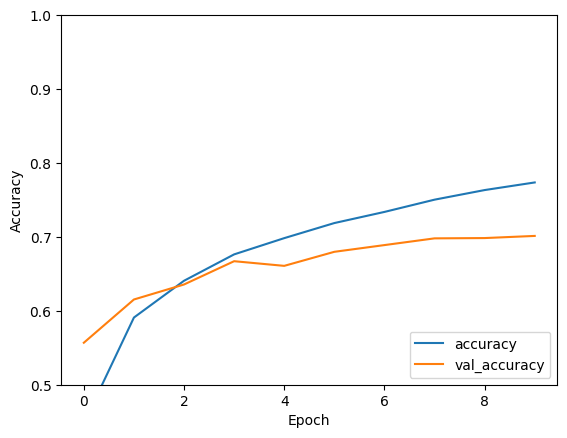

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7013000249862671


この単純な CNN は、 数行のコードで 70％ を超えるテスト精度を達成しています。別の CNN スタイルについては、Keras サブクラス化 API と{`tf.GradientTape`を使用する[ 上級者向け TensorFlow 2 クイックスタート](https://www.tensorflow.org/tutorials/quickstart/advanced)の例を参照してください。